# AUTHOR: ALEX JUMA 
ALL CODE IS MY OWN, THIS IS AN EXERCISE FROM THE PIERAN DATA SCIENCE COURSE ON UDEMY...

## Overview

If you are planning on going out to see a movie, how well can you trust online reviews and ratings? *Especially* if the same company showing the rating *also* makes money by selling movie tickets. Do they have a bias towards rating movies higher than they should be rated?

### Goal:

**Your goal is to complete the tasks below based off the 538 article and see if you reach a similar conclusion. You will need to use your pandas and visualization skills to determine if Fandango's ratings in 2015 had a bias towards rating movies better to sell more tickets.**

---
---

**Complete the tasks written in bold.**

---
----

## Part One: Understanding the Background and Data


**TASK: Read this article: [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/)**

----

**TASK: After reading the article, read these two tables giving an overview of the two .csv files we will be working with:**

### The Data

This is the data behind the story [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](http://fivethirtyeight.com/features/fandango-movies-ratings/) openly available on 538's github: https://github.com/fivethirtyeight/data. There are two csv files, one with Fandango Stars and Displayed Ratings, and the other with aggregate data for movie ratings from other sites, like Metacritic,IMDB, and Rotten Tomatoes.

#### all_sites_scores.csv

-----

`all_sites_scores.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb

----
----

#### fandango_scape.csv

`fandango_scrape.csv` contains every film 538 pulled from Fandango.

Column | Definiton
--- | ---------
FILM | The movie
STARS | Number of stars presented on Fandango.com
RATING |  The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
VOTES | number of people who had reviewed the film at the time we pulled it.

----

**TASK: Import any libraries you think you will use:**

In [113]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Part Two: Exploring Fandango Displayed Scores versus True User Ratings

Let's first explore the Fandango ratings to see if our analysis agrees with the article's conclusion.

**TASK: Run the cell below to read in the fandango_scrape.csv file**

In [114]:
df = pd.read_csv("fandango_scrape.csv")

**TASK: Explore the DataFrame Properties and Head.**

In [115]:
df.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [117]:
df.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


**TASK: Let's explore the relationship between popularity of a film and its rating. Create a scatterplot showing the relationship between rating and votes. Feel free to edit visual styling to your preference.**

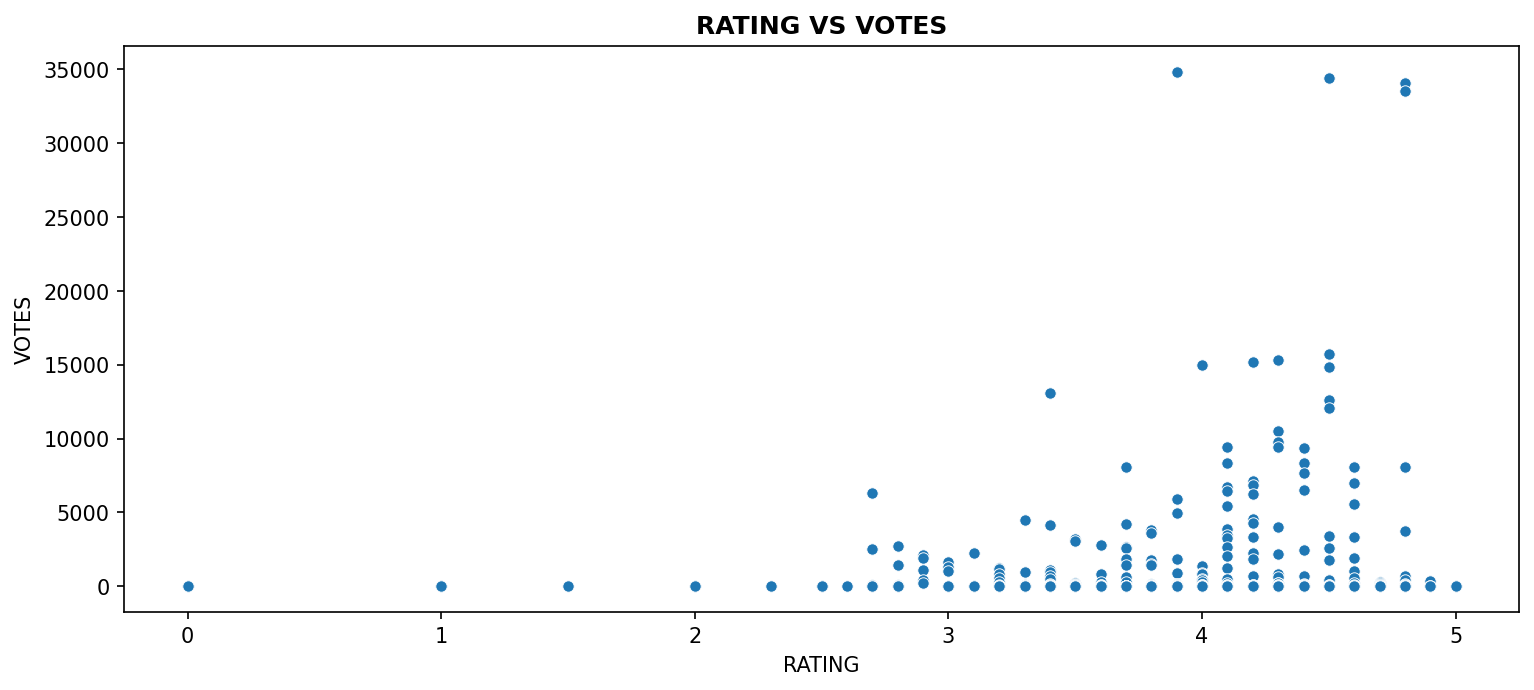

In [118]:
#df.head()

fig, ax = plt.subplots(figsize=(12,5), dpi=150)
fig = sns.scatterplot(data=df,
                      x='RATING',
                      y='VOTES',
                      ax=ax,
                      s=30)

ax.set_title('RATING VS VOTES',
             fontweight=600)

plt.show()

**TASK: Calculate the correlation between the columns:**

In [119]:
df.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


**TASK: Assuming that every row in the FILM title column has the same format:**

    Film Title Name (Year)
    
**Create a new column that is able to strip the year from the title strings and set this new column as YEAR**

In [120]:
#df.head()
df['YEAR'] = df['FILM'].str.split(' ').str[-1].str[1:-1]
df.tail()

,FILM,STARS,RATING,VOTES,YEAR
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964
503,Zarafa (2012),0.0,0.0,0,2012


**TASK: How many movies are in the Fandango DataFrame per year?**

In [121]:
df['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

**TASK: Visualize the count of movies per year with a plot:**

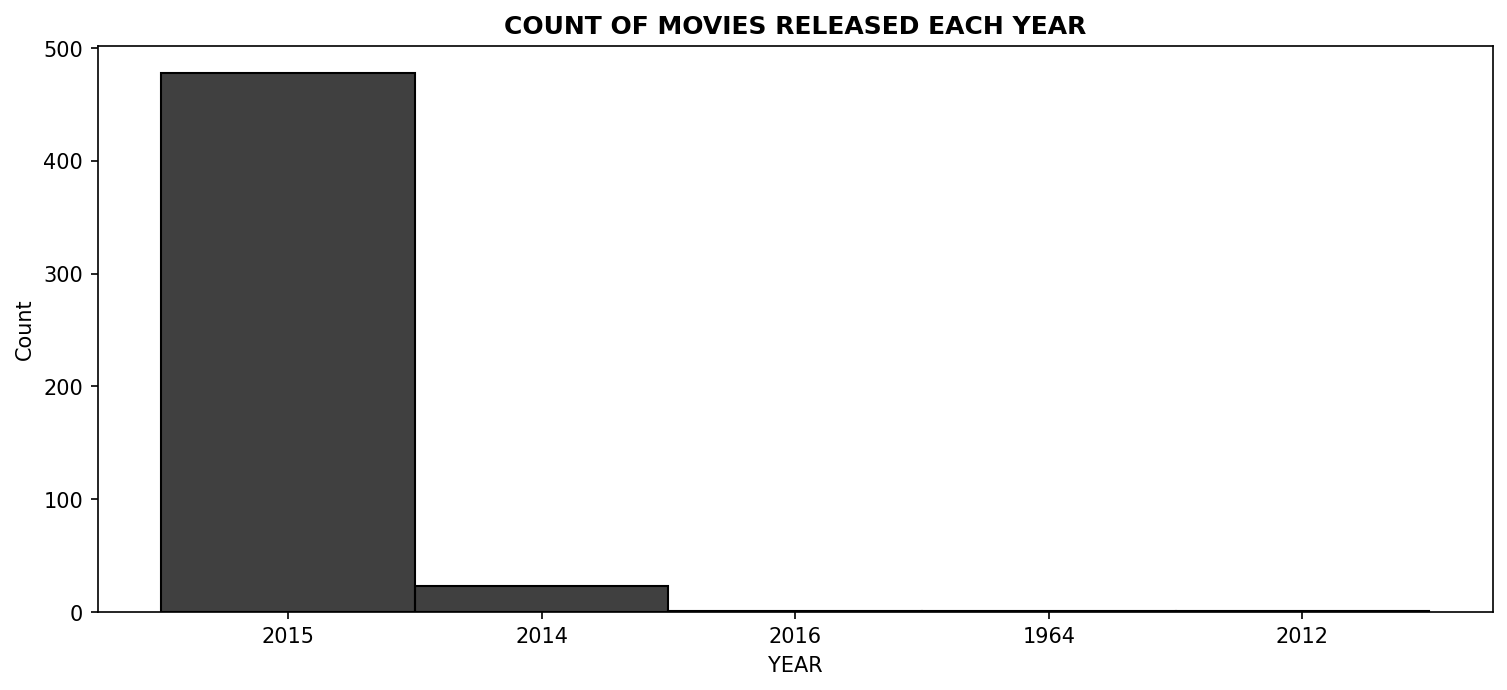

In [122]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=150)
fig = sns.histplot(data=df,
                   x='YEAR',
                   ax=ax,
                   palette='bright',
                   color='black')

ax.set_title('COUNT OF MOVIES RELEASED EACH YEAR',
             fontweight=600)

plt.show()

**TASK: What are the 10 movies with the highest number of votes?**

In [123]:
df.nlargest(10, 'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


**TASK: How many movies have zero votes?**

In [124]:
rows = len(df[df['VOTES'] == 0])
print(f'There were {rows} movies with 0 votes') 

There were 69 movies with 0 votes


**TASK: Create DataFrame of only reviewed films by removing any films that have zero votes.**

In [125]:
df = df[df['VOTES']!=0]
df['VOTES'].min() #minimum number of votes after filtering

1

----

**As noted in the article, due to HTML and star rating displays, the true user rating may be slightly different than the rating shown to a user. Let's visualize this difference in distributions.**

**TASK: Create a KDE plot (or multiple kdeplots) that displays the distribution of ratings that are displayed (STARS) versus what the true rating was from votes (RATING). Clip the KDEs to 0-5.**

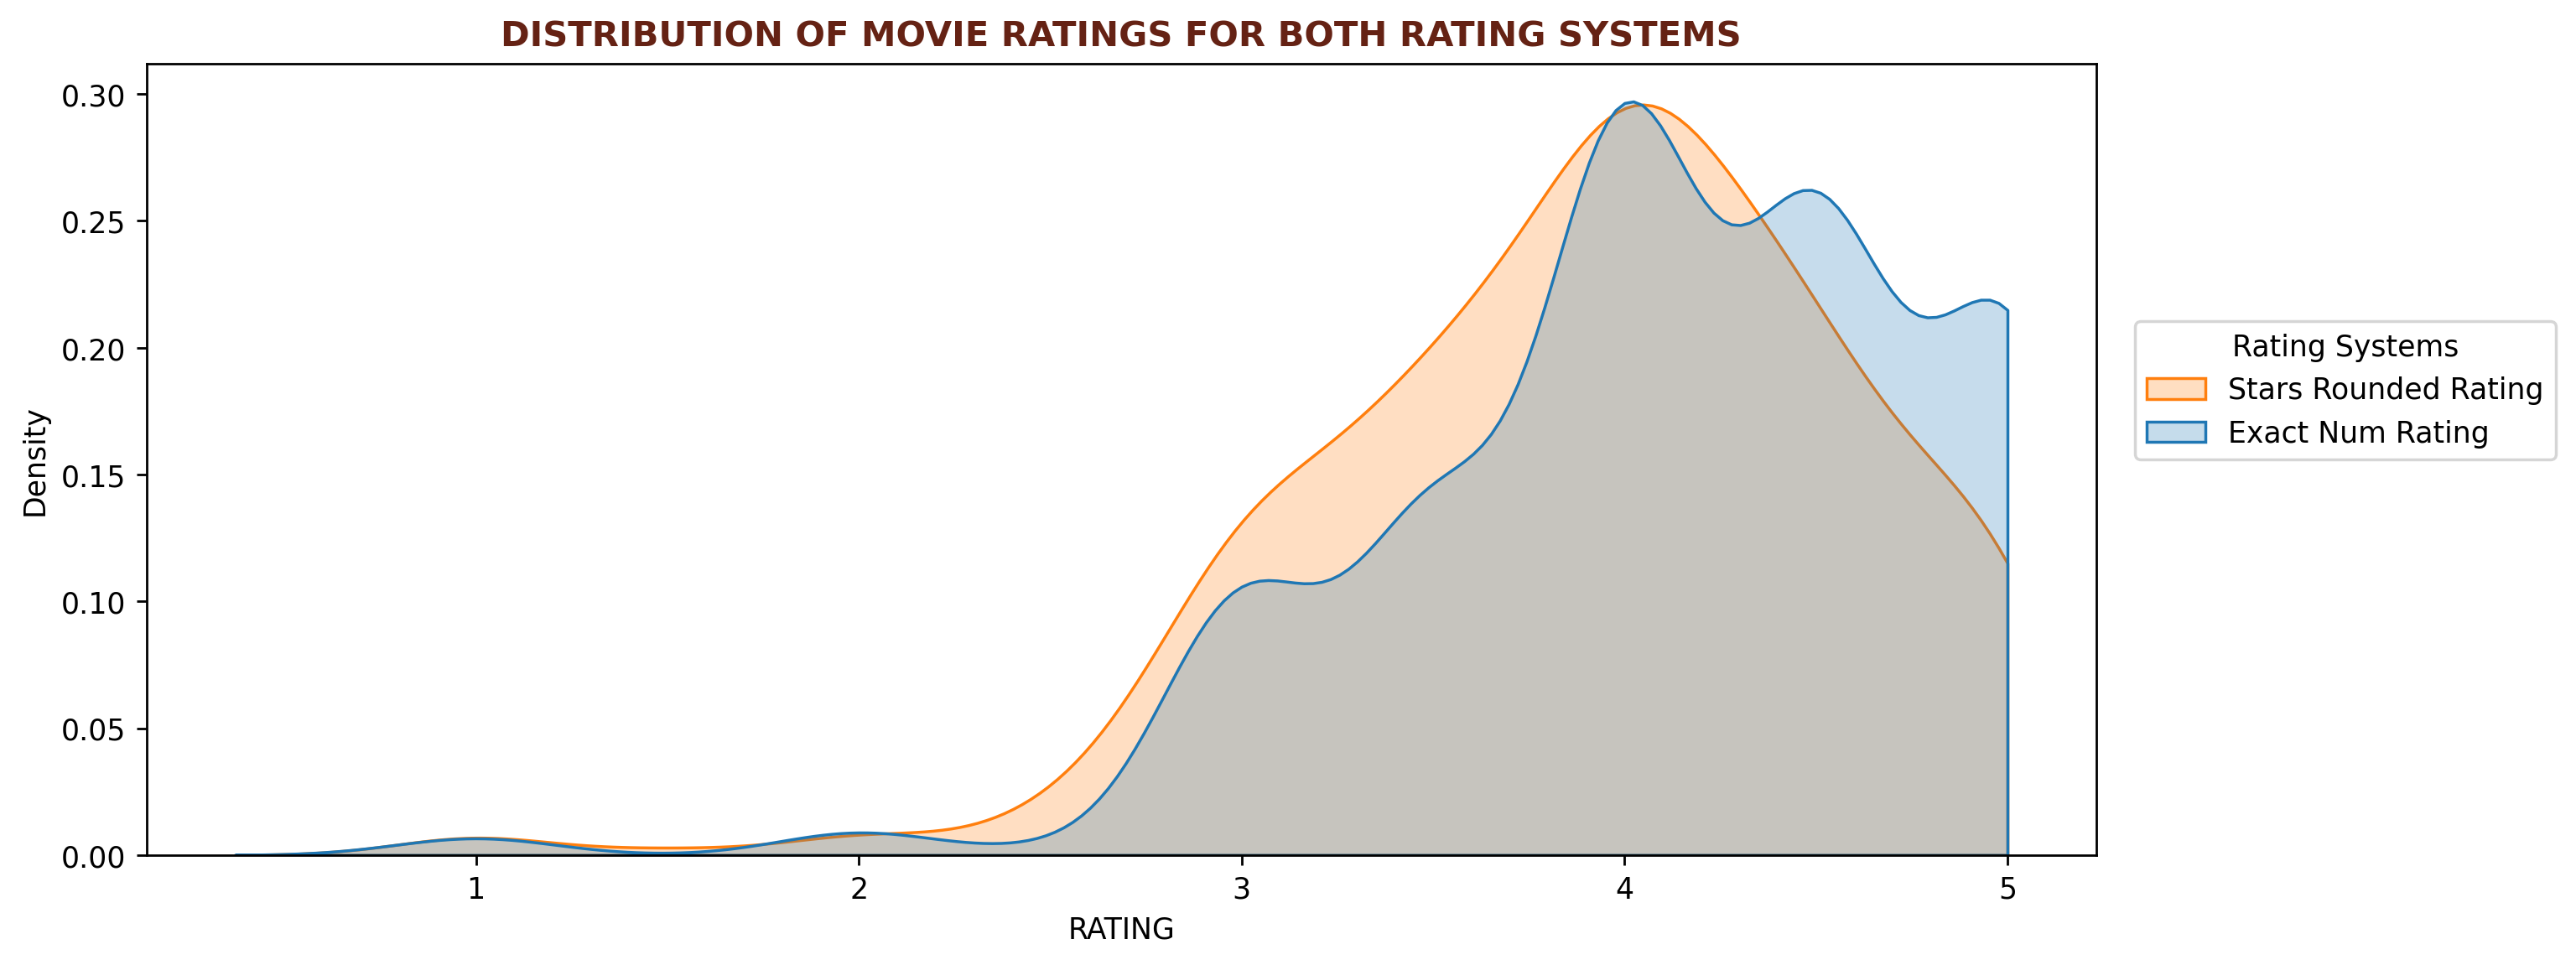

In [126]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.kdeplot(data=df[['STARS', 'RATING']],
                  ax=ax,
                  shade=True,
                  clip=[0,5],
                  bw_adjust=1)

ax.set_title('DISTRIBUTION OF MOVIE RATINGS FOR BOTH RATING SYSTEMS',
             fontweight=600,
             color='#652214')

ax.set_xlabel('RATING')

plt.legend(title='Rating Systems',
           labels=['Stars Rounded Rating','Exact Num Rating'],
           loc=[1.02,0.5])

plt.show()

**TASK: Let's now actually quantify this discrepancy. Create a new column of the different between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nearest decimal point.**

In [127]:
df['Stars_diff'] = np.round((df['STARS'] - df['RATING']),1)
df.head()

,FILM,STARS,RATING,VOTES,YEAR,Stars_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0


**TASK: Create a count plot to display the number of times a certain difference occurs:**

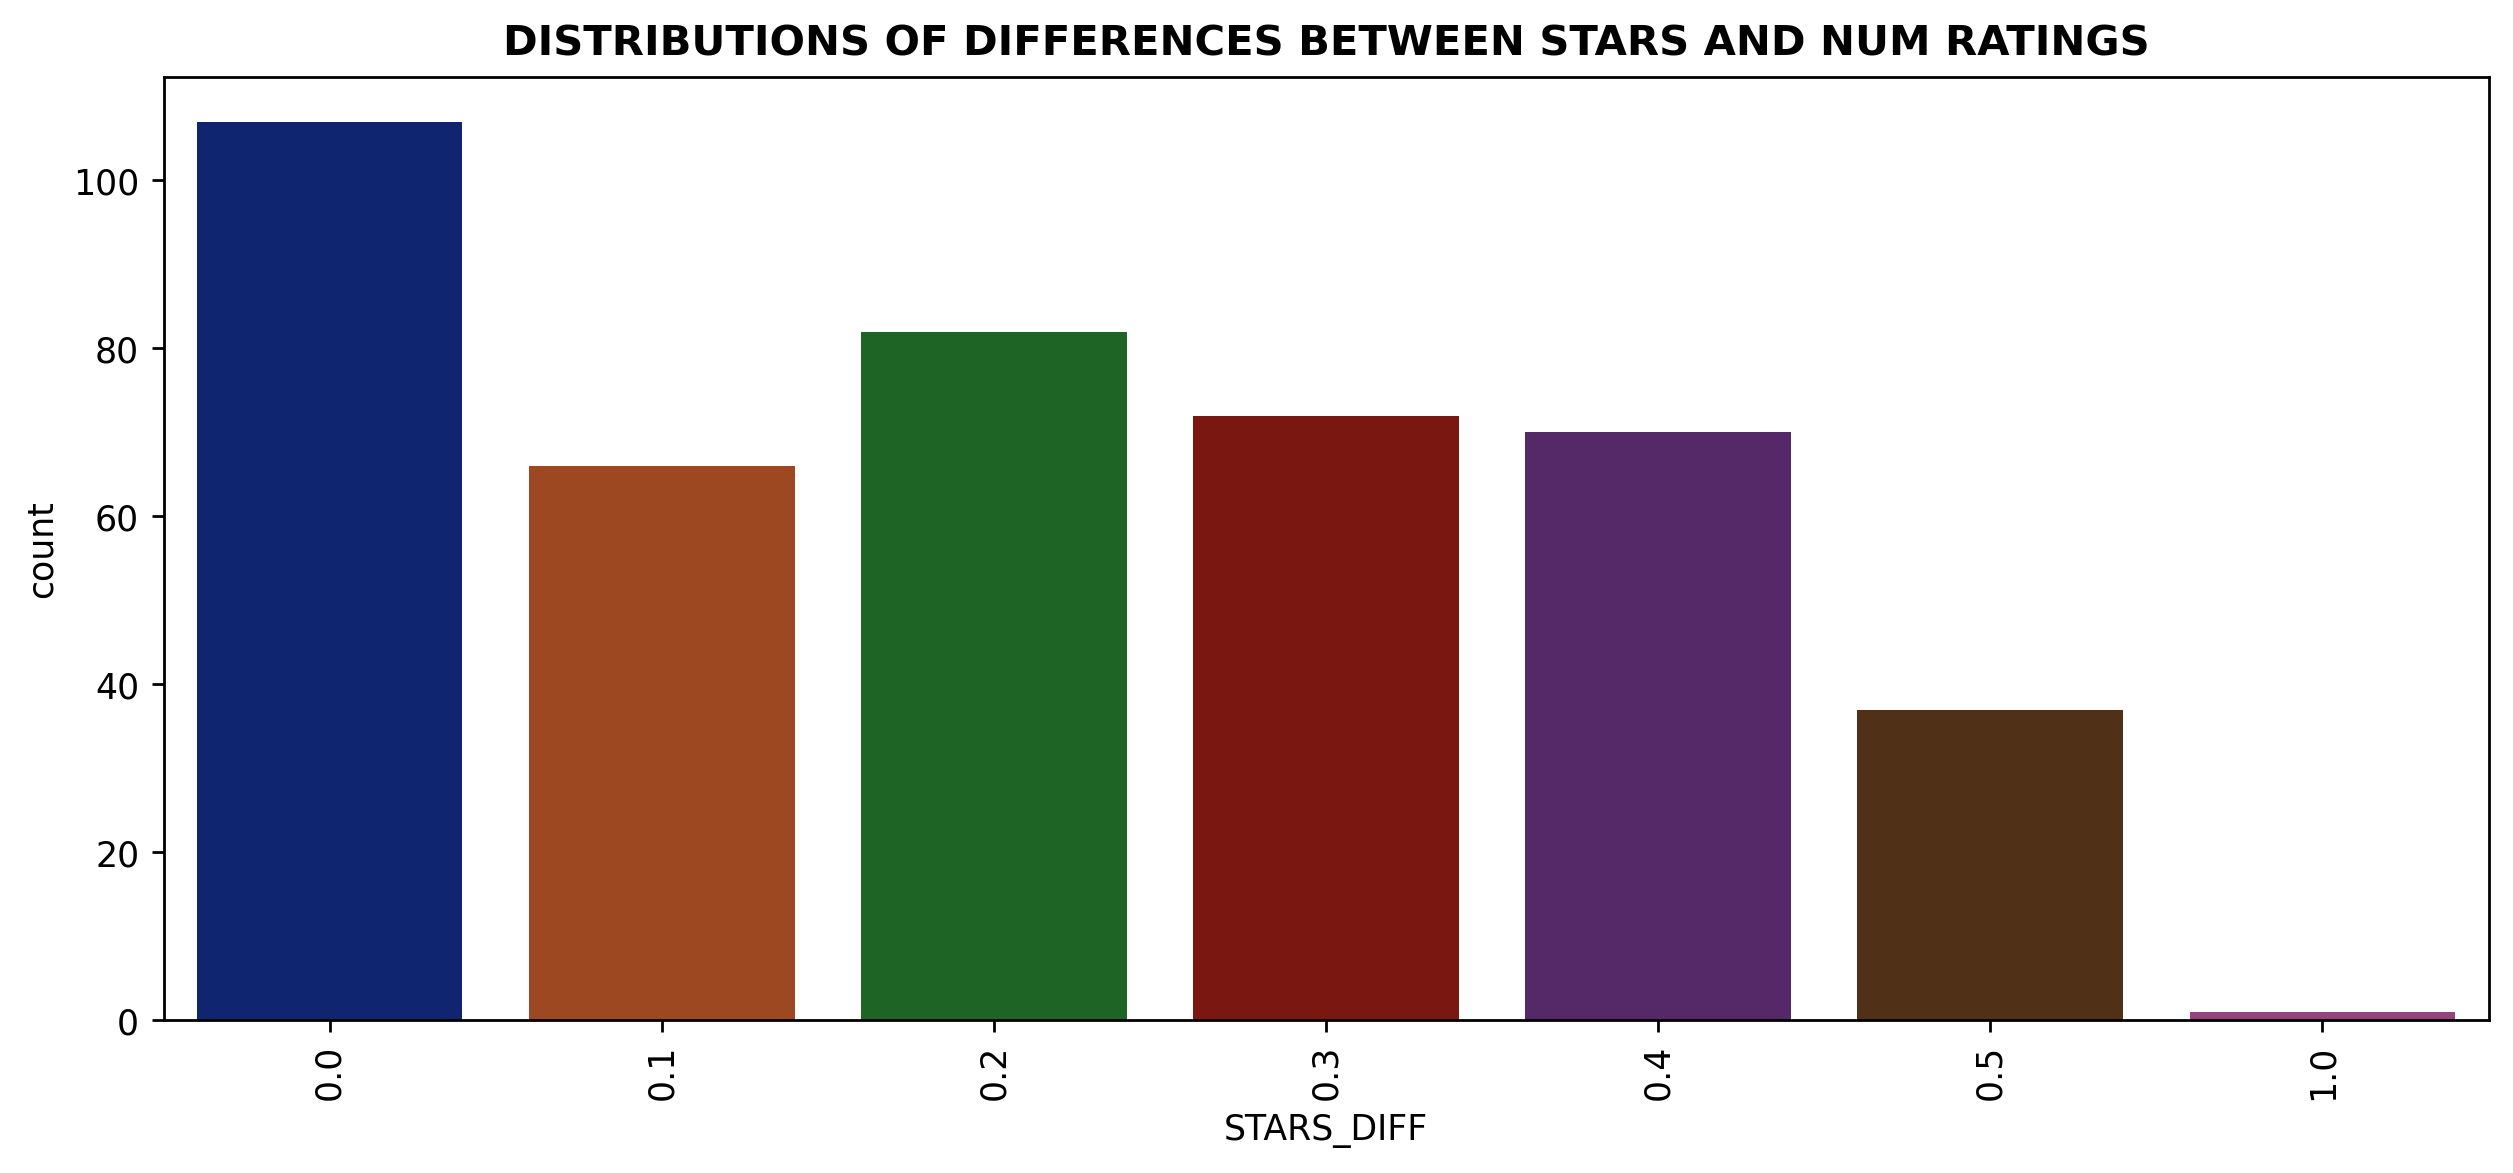

In [128]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.countplot(data=df,
                    x='Stars_diff',
                    palette='dark',
                    ax=ax)

ax.set_title('DISTRIBUTIONS OF DIFFERENCES BETWEEN STARS AND NUM RATINGS',
             fontweight=600)
ax.set_xlabel('STARS_DIFF')

label = df.Stars_diff.unique()
label.sort()
fig.set_xticklabels(labels=label, rotation=90)

plt.show()

**TASK: We can see from the plot that one movie was displaying over a 1 star difference than its true rating! What movie had this close to 1 star differential?**

In [129]:
df[df['Stars_diff']==1] #the culprit is Turbo Kid

,FILM,STARS,RATING,VOTES,YEAR,Stars_diff
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Part Three: Comparison of Fandango Ratings to Other Sites

Let's now compare the scores from Fandango to other movies sites and see how they compare.

**TASK: Read in the "all_sites_scores.csv" file by running the cell below**

In [130]:
df2 = pd.read_csv("all_sites_scores.csv")

**TASK: Explore the DataFrame columns, info, description.**

In [131]:
df2

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560
...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367
142,'71 (2015),97,82,83,7.5,7.2,60,24116
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955


In [132]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [133]:
df2.columns

Index(['FILM', 'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count'],
      dtype='object')

In [134]:
df2.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


### Rotten Tomatoes

Let's first take a look at Rotten Tomatoes. RT has two sets of reviews, their critics reviews (ratings published by official critics) and user reviews. 

**TASK: Create a scatterplot exploring the relationship between RT Critic reviews and RT User reviews.**

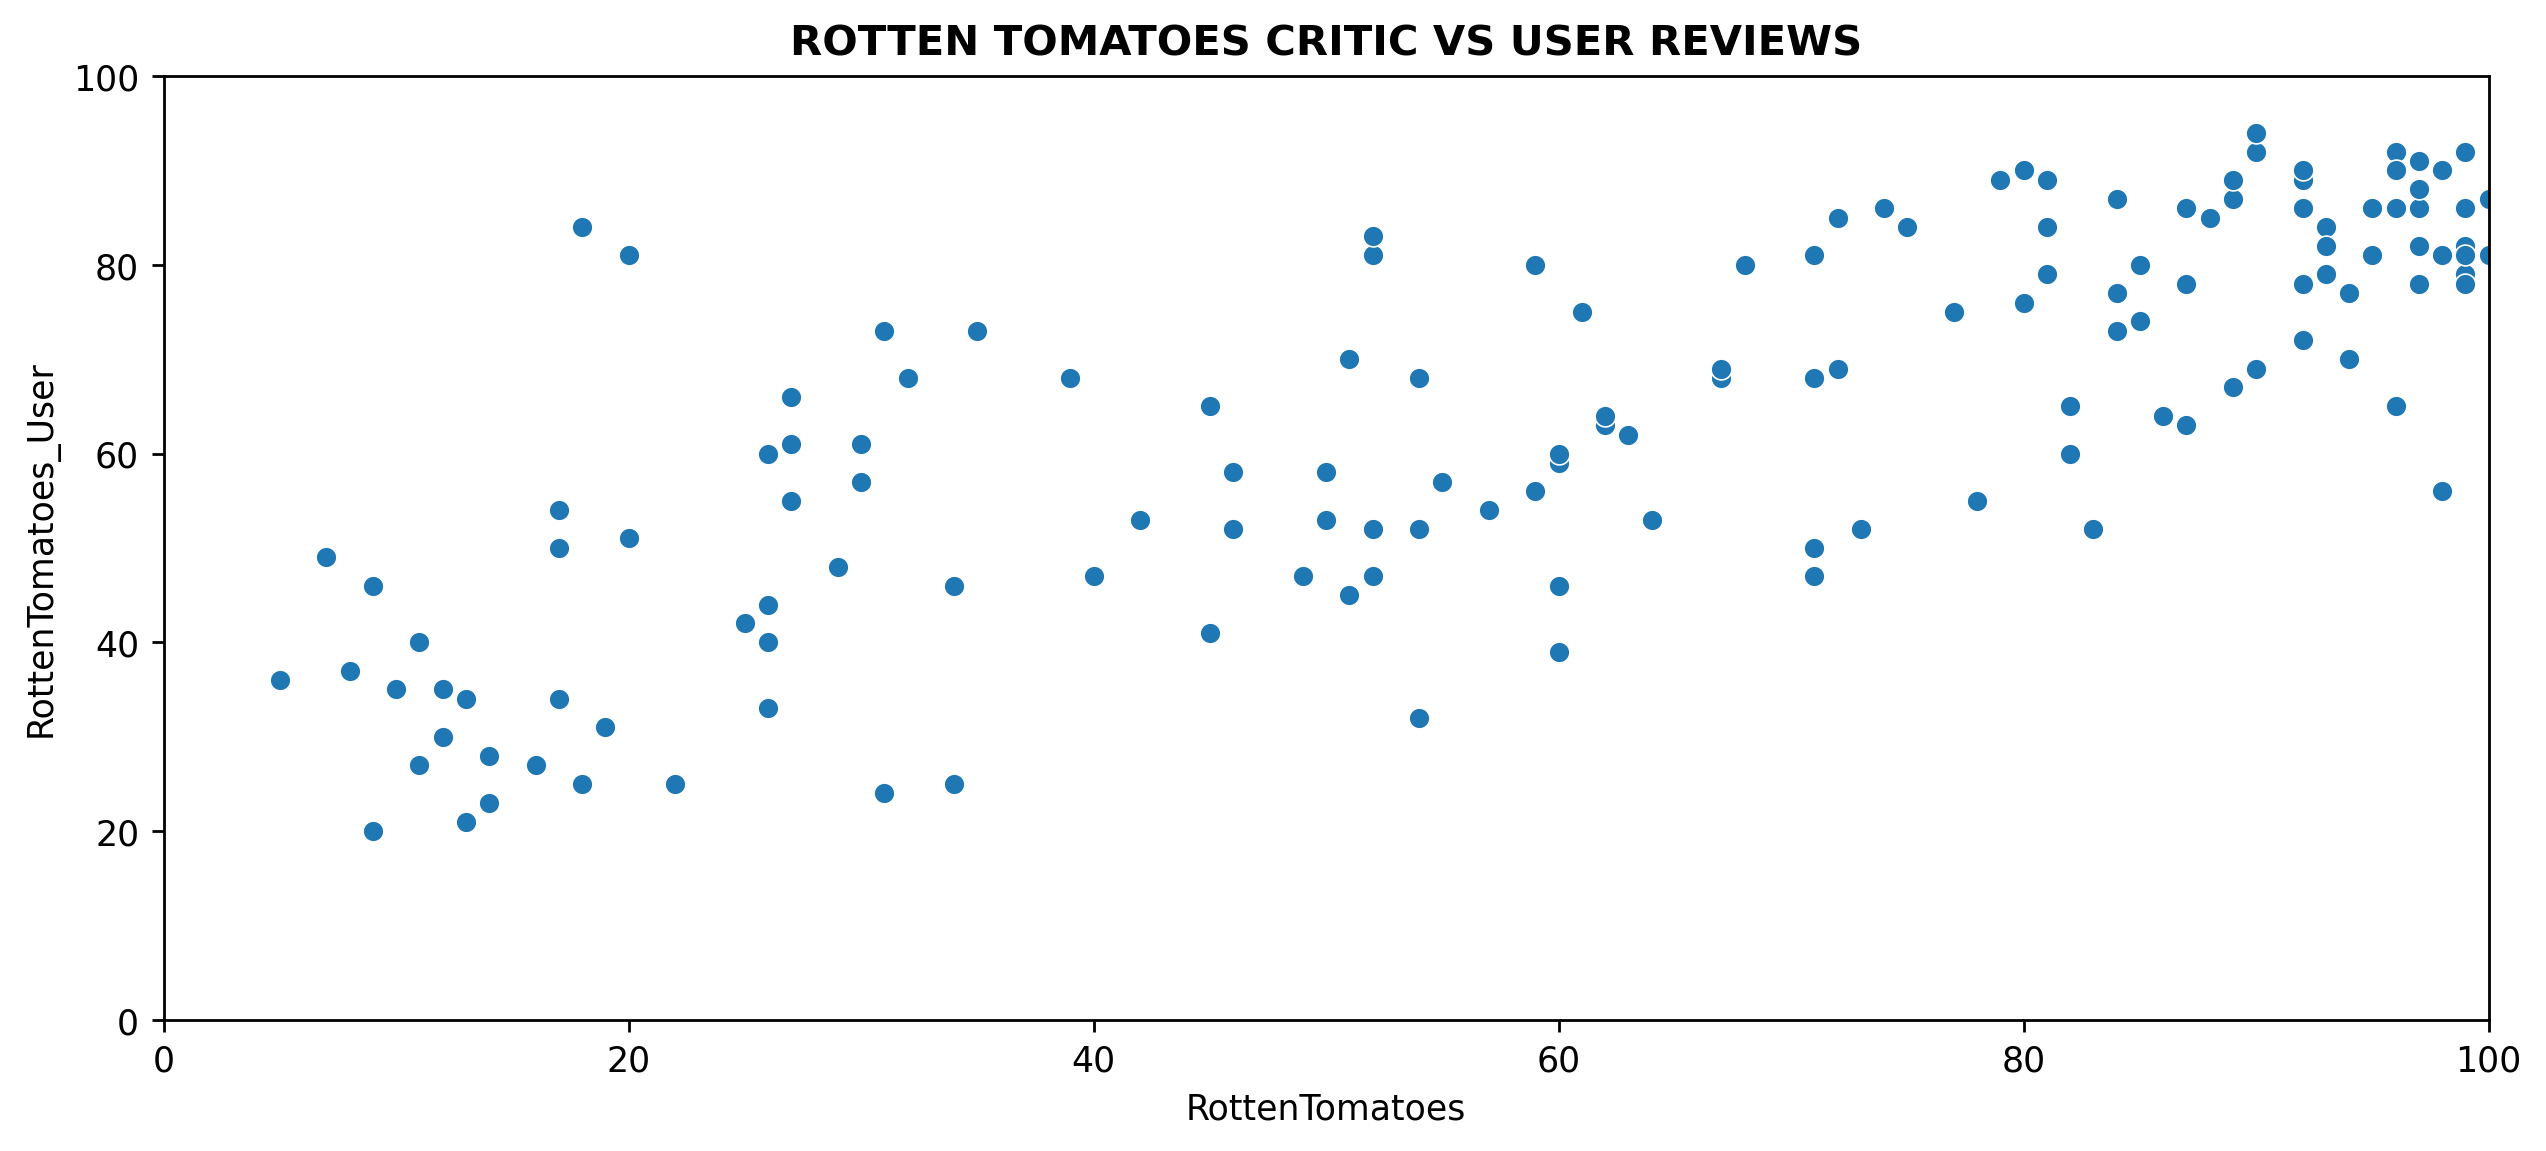

In [135]:
#df2.head()
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.scatterplot(x=df2.RottenTomatoes,
                      y=df2.RottenTomatoes_User,
                      ax=ax)

ax.set_title('ROTTEN TOMATOES CRITIC VS USER REVIEWS',
             fontweight=600)
ax.set_xlim(0,100)
ax.set_ylim(0,100)

plt.show()

Let's quantify this difference by comparing the critics ratings and the RT User ratings. We will calculate this with RottenTomatoes-RottenTomatoes_User. Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users. Larger positive values means critics rated much higher than users. Larger negative values means users rated much higher than critics.

**TASK: Create a new column based off the difference between critics ratings and users ratings for Rotten Tomatoes. Calculate this with RottenTomatoes-RottenTomatoes_User**

In [136]:
df2['Rotten_diff'] = np.round((df2['RottenTomatoes'] - df2['RottenTomatoes_User']),2)
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


Let's now compare the overall mean difference. Since we're dealing with differences that could be negative or positive, first take the absolute value of all the differences, then take the mean. This would report back on average to absolute difference between the critics rating versus the user rating.

**TASK: Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.**

In [137]:
mae = abs(df2['Rotten_diff']).sum()/len(df2)
print(f'The Mean Absolute Error for the Rotten_diff column is {mae}')

The Mean Absolute Error for the Rotten_diff column is 15.095890410958905


**TASK: Plot the distribution of the differences between RT Critics Score and RT User Score. There should be negative values in this distribution plot. Feel free to use KDE or Histograms to display this distribution.**

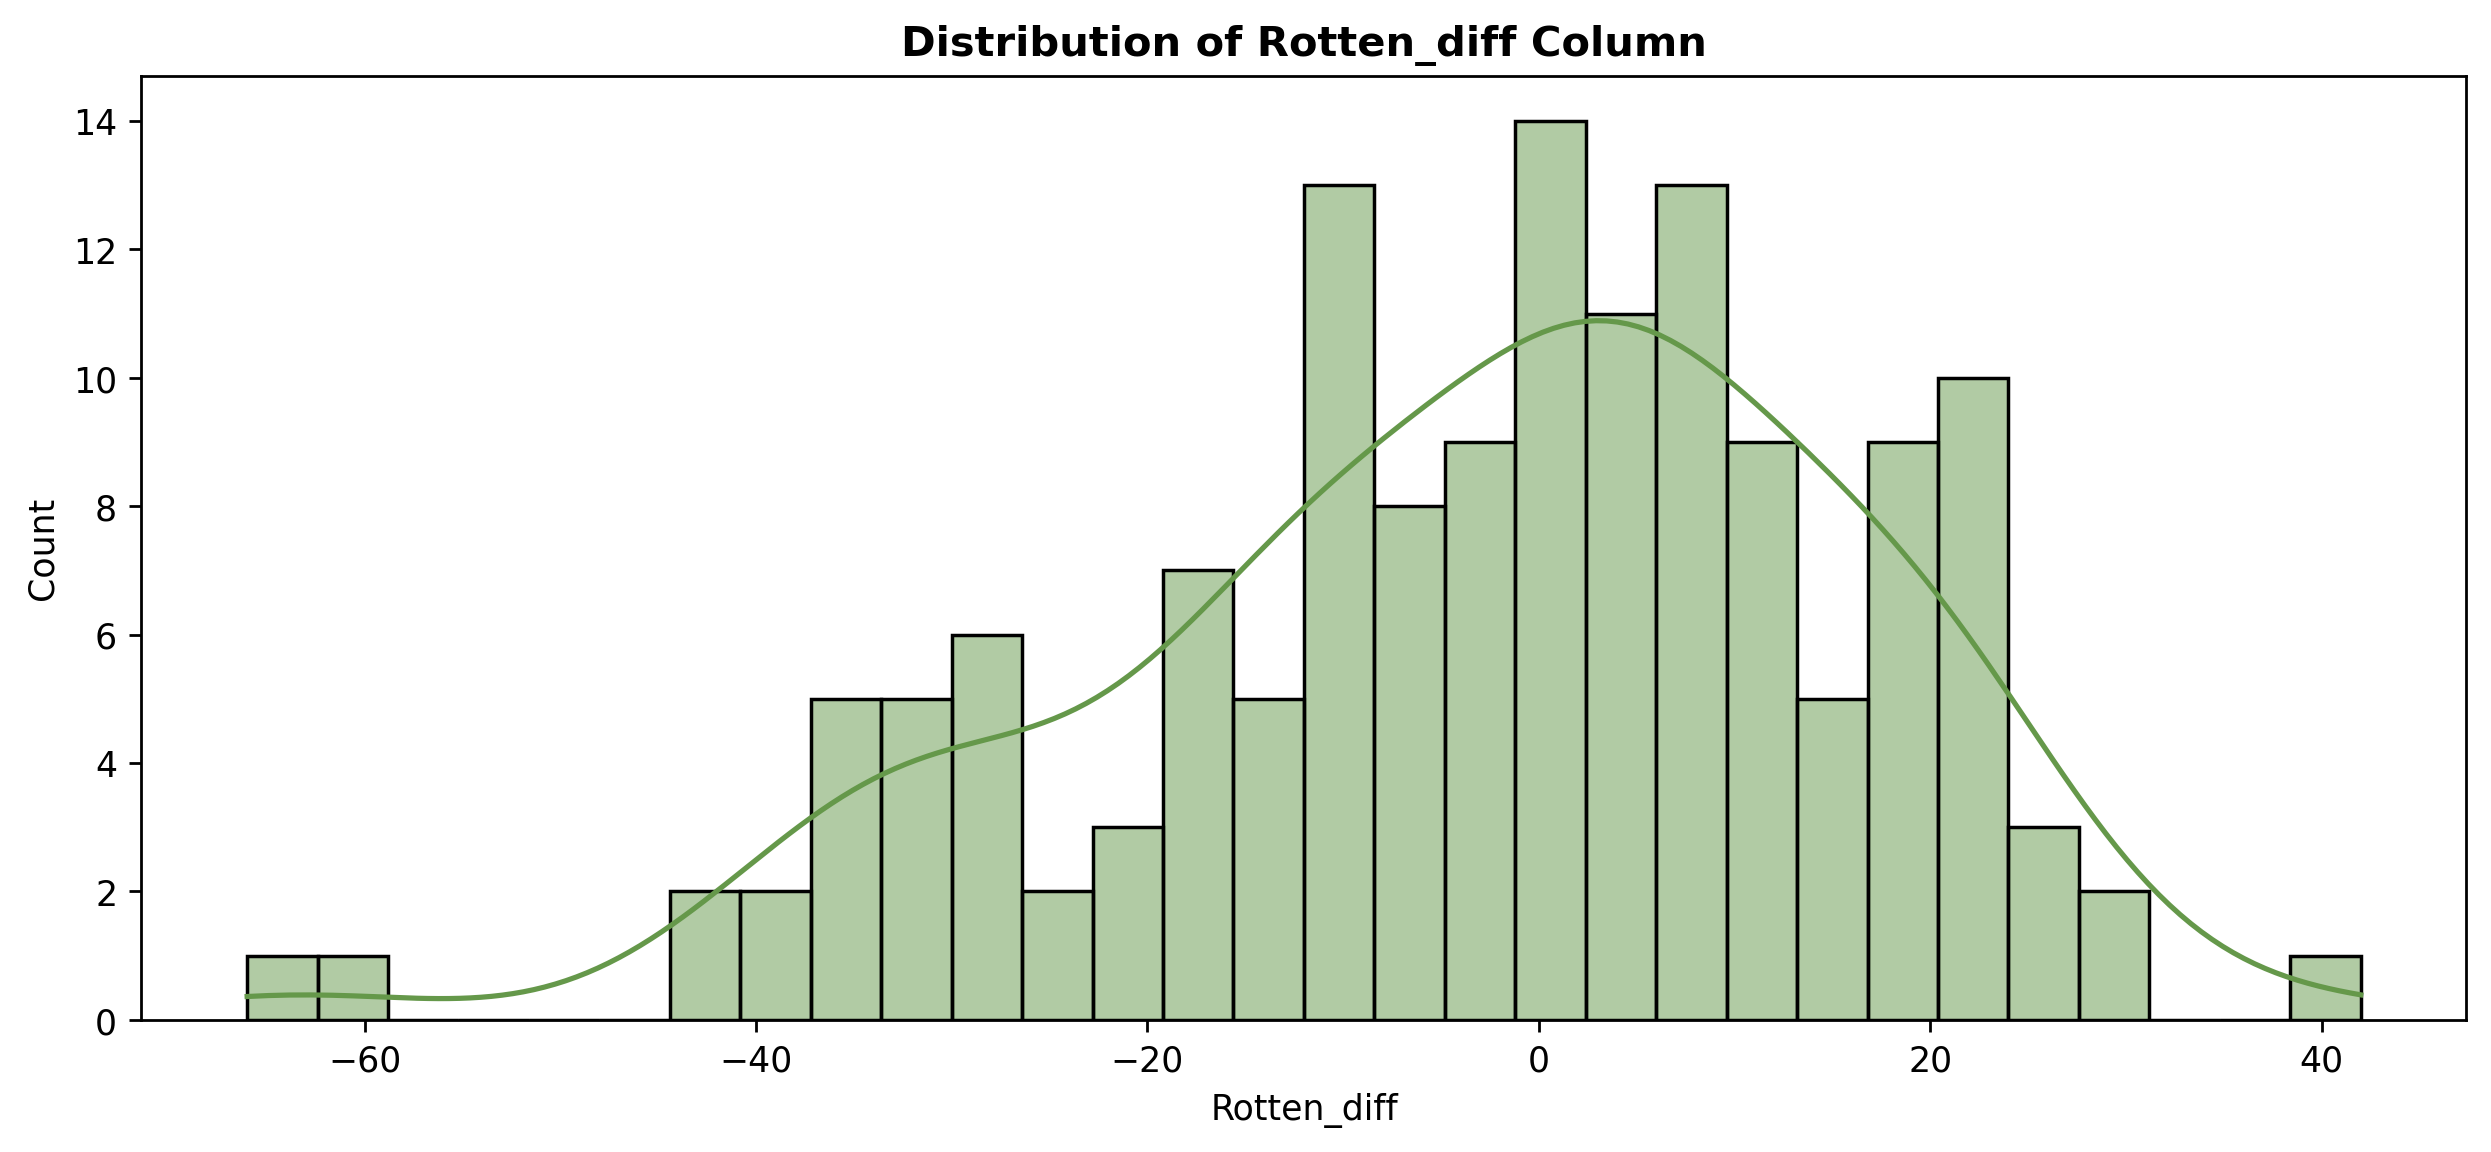

In [138]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.histplot(x=df2.Rotten_diff,
                   bins=30,
                   kde=True,
                   color='#65984A',
                   ax=ax)

ax.set_title('Distribution of Rotten_diff Column',
             fontweight=600)

plt.show()

**TASK: Now create a distribution showing the *absolute value* difference between Critics and Users on Rotten Tomatoes.**

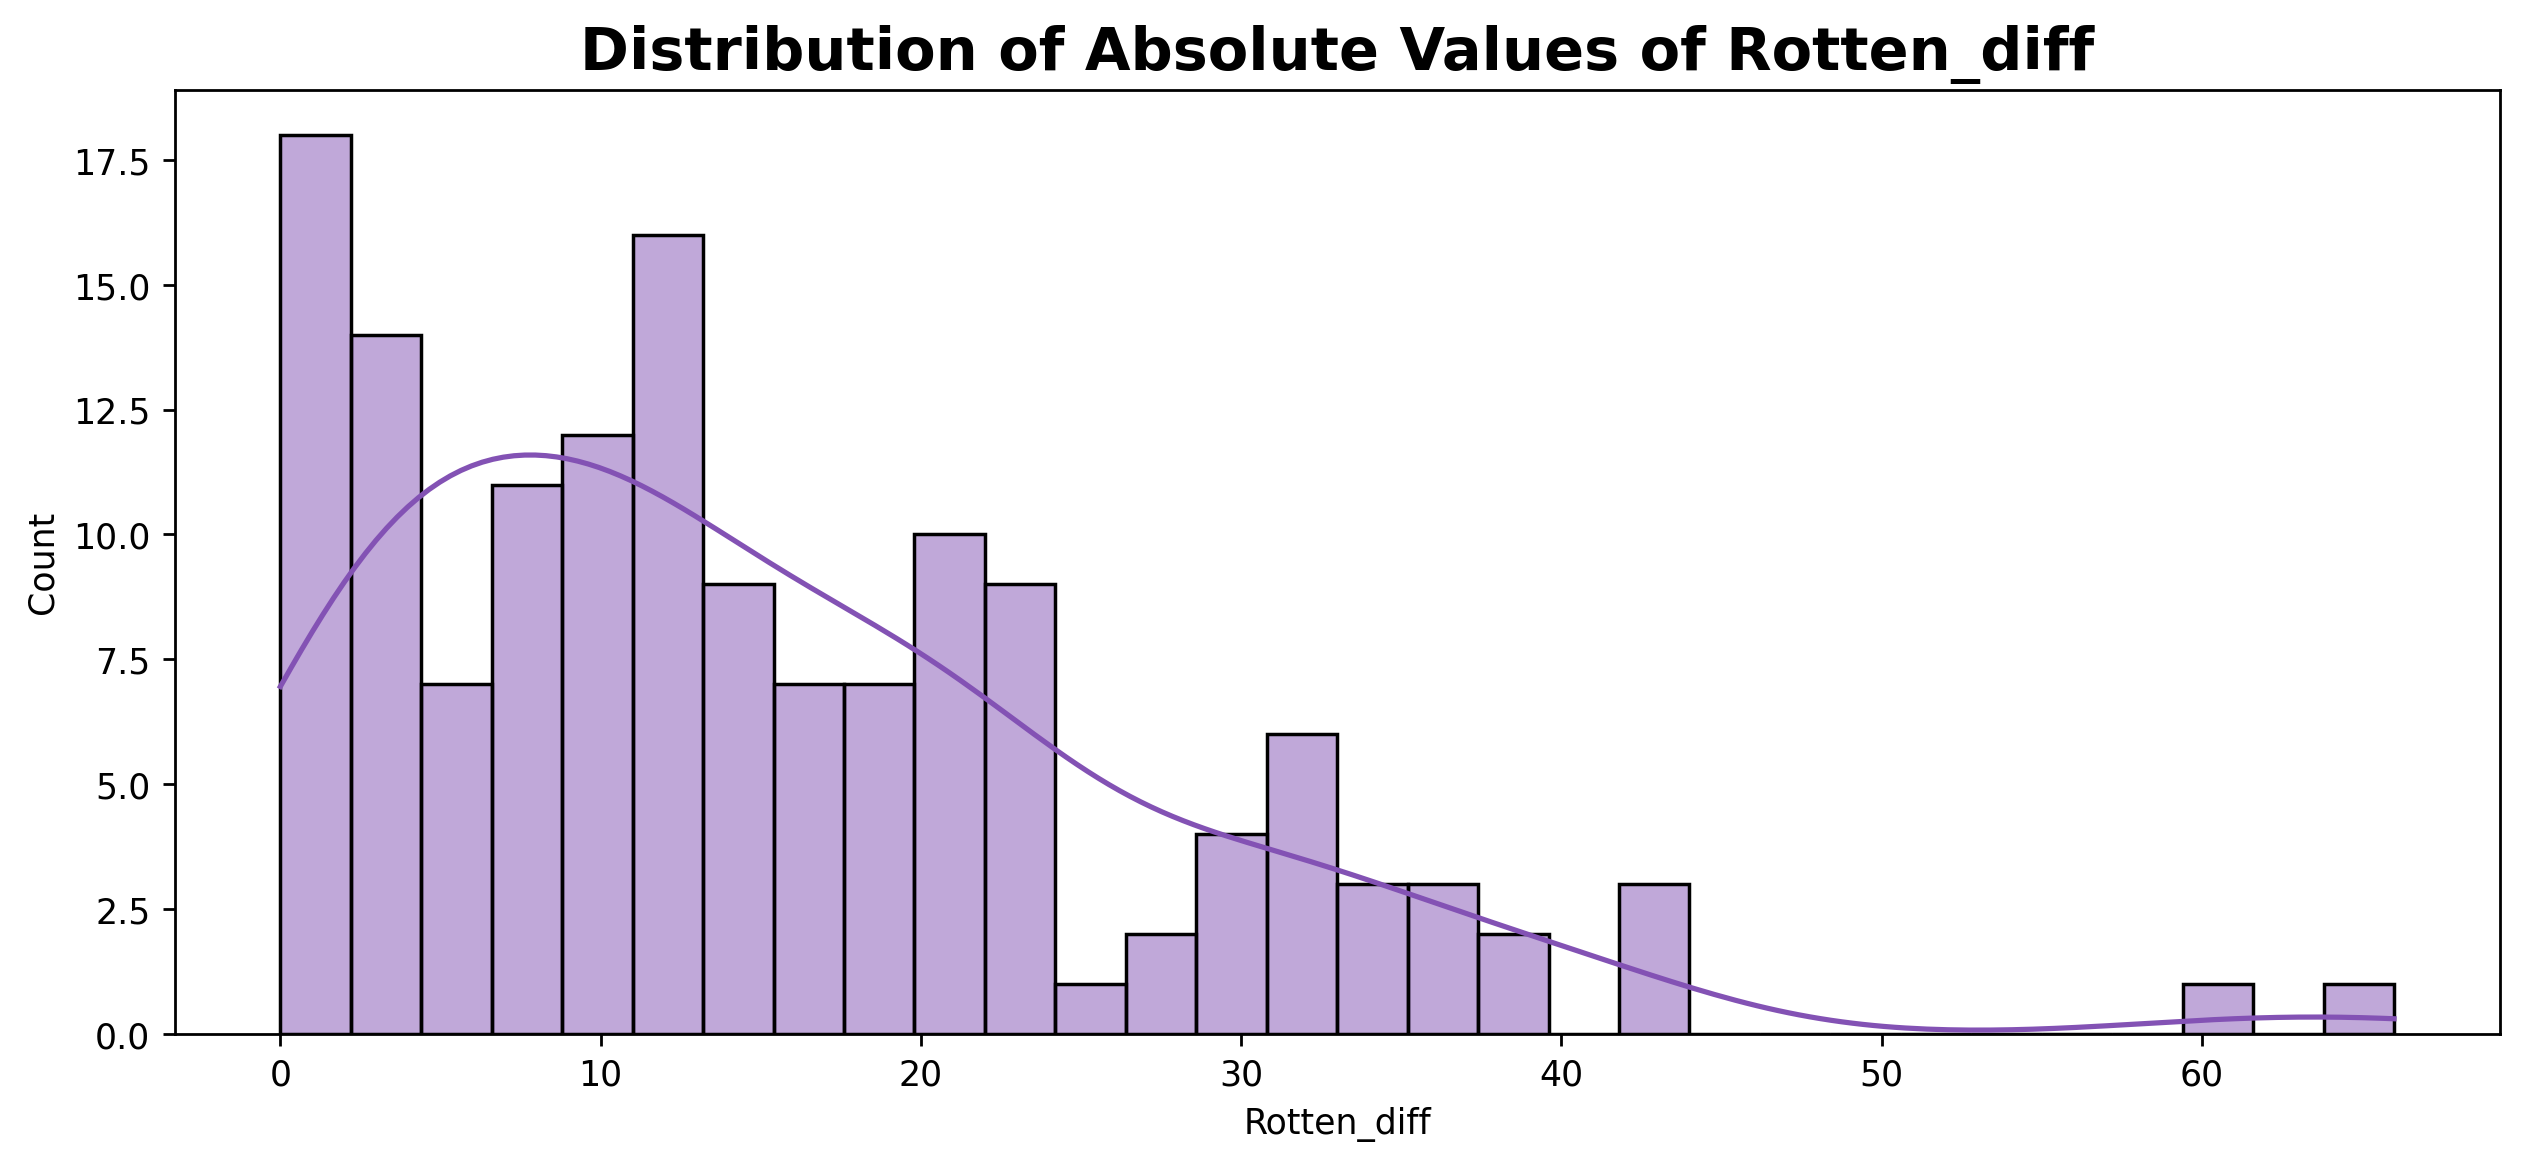

In [139]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.histplot(x=abs(df2.Rotten_diff),
                   bins=30,
                   kde=True, 
                   color='#8352B4',
                   ax=ax)

ax.set_title('Distribution of Absolute Values of Rotten_diff',
             fontsize=17, 
             fontweight=600)

plt.show()

**Let's find out which movies are causing the largest differences. First, show the top 5 movies with the largest *negative* difference between Users and RT critics. Since we calculated the difference as Critics Rating - Users Rating, then large negative values imply the users rated the movie much higher on average than the critics did.**

**TASK: What are the top 5 movies users rated higher than critics on average:**

In [140]:
print(f'Movies that Users loved more than Critics:')
df2[df2['Rotten_diff']<0].nsmallest(5, 'Rotten_diff')[['FILM', 'Rotten_diff']]

Movies that Users loved more than Critics:


,FILM,Rotten_diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
105,Hitman: Agent 47 (2015),-42
134,The Longest Ride (2015),-42
125,The Wedding Ringer (2015),-39


**TASK: Now show the top 5 movies critics scores higher than users on average.**

In [141]:
print('Movies that Critics loved more than Users:')
df2.nlargest(5, 'Rotten_diff')[['FILM','Rotten_diff']]

Movies that Critics loved more than Users:


,FILM,Rotten_diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24


## MetaCritic

Now let's take a quick look at the ratings from MetaCritic. Metacritic also shows an average user rating versus their official displayed rating.

**TASK: Display a scatterplot of the Metacritic Rating versus the Metacritic User rating.**

In [142]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


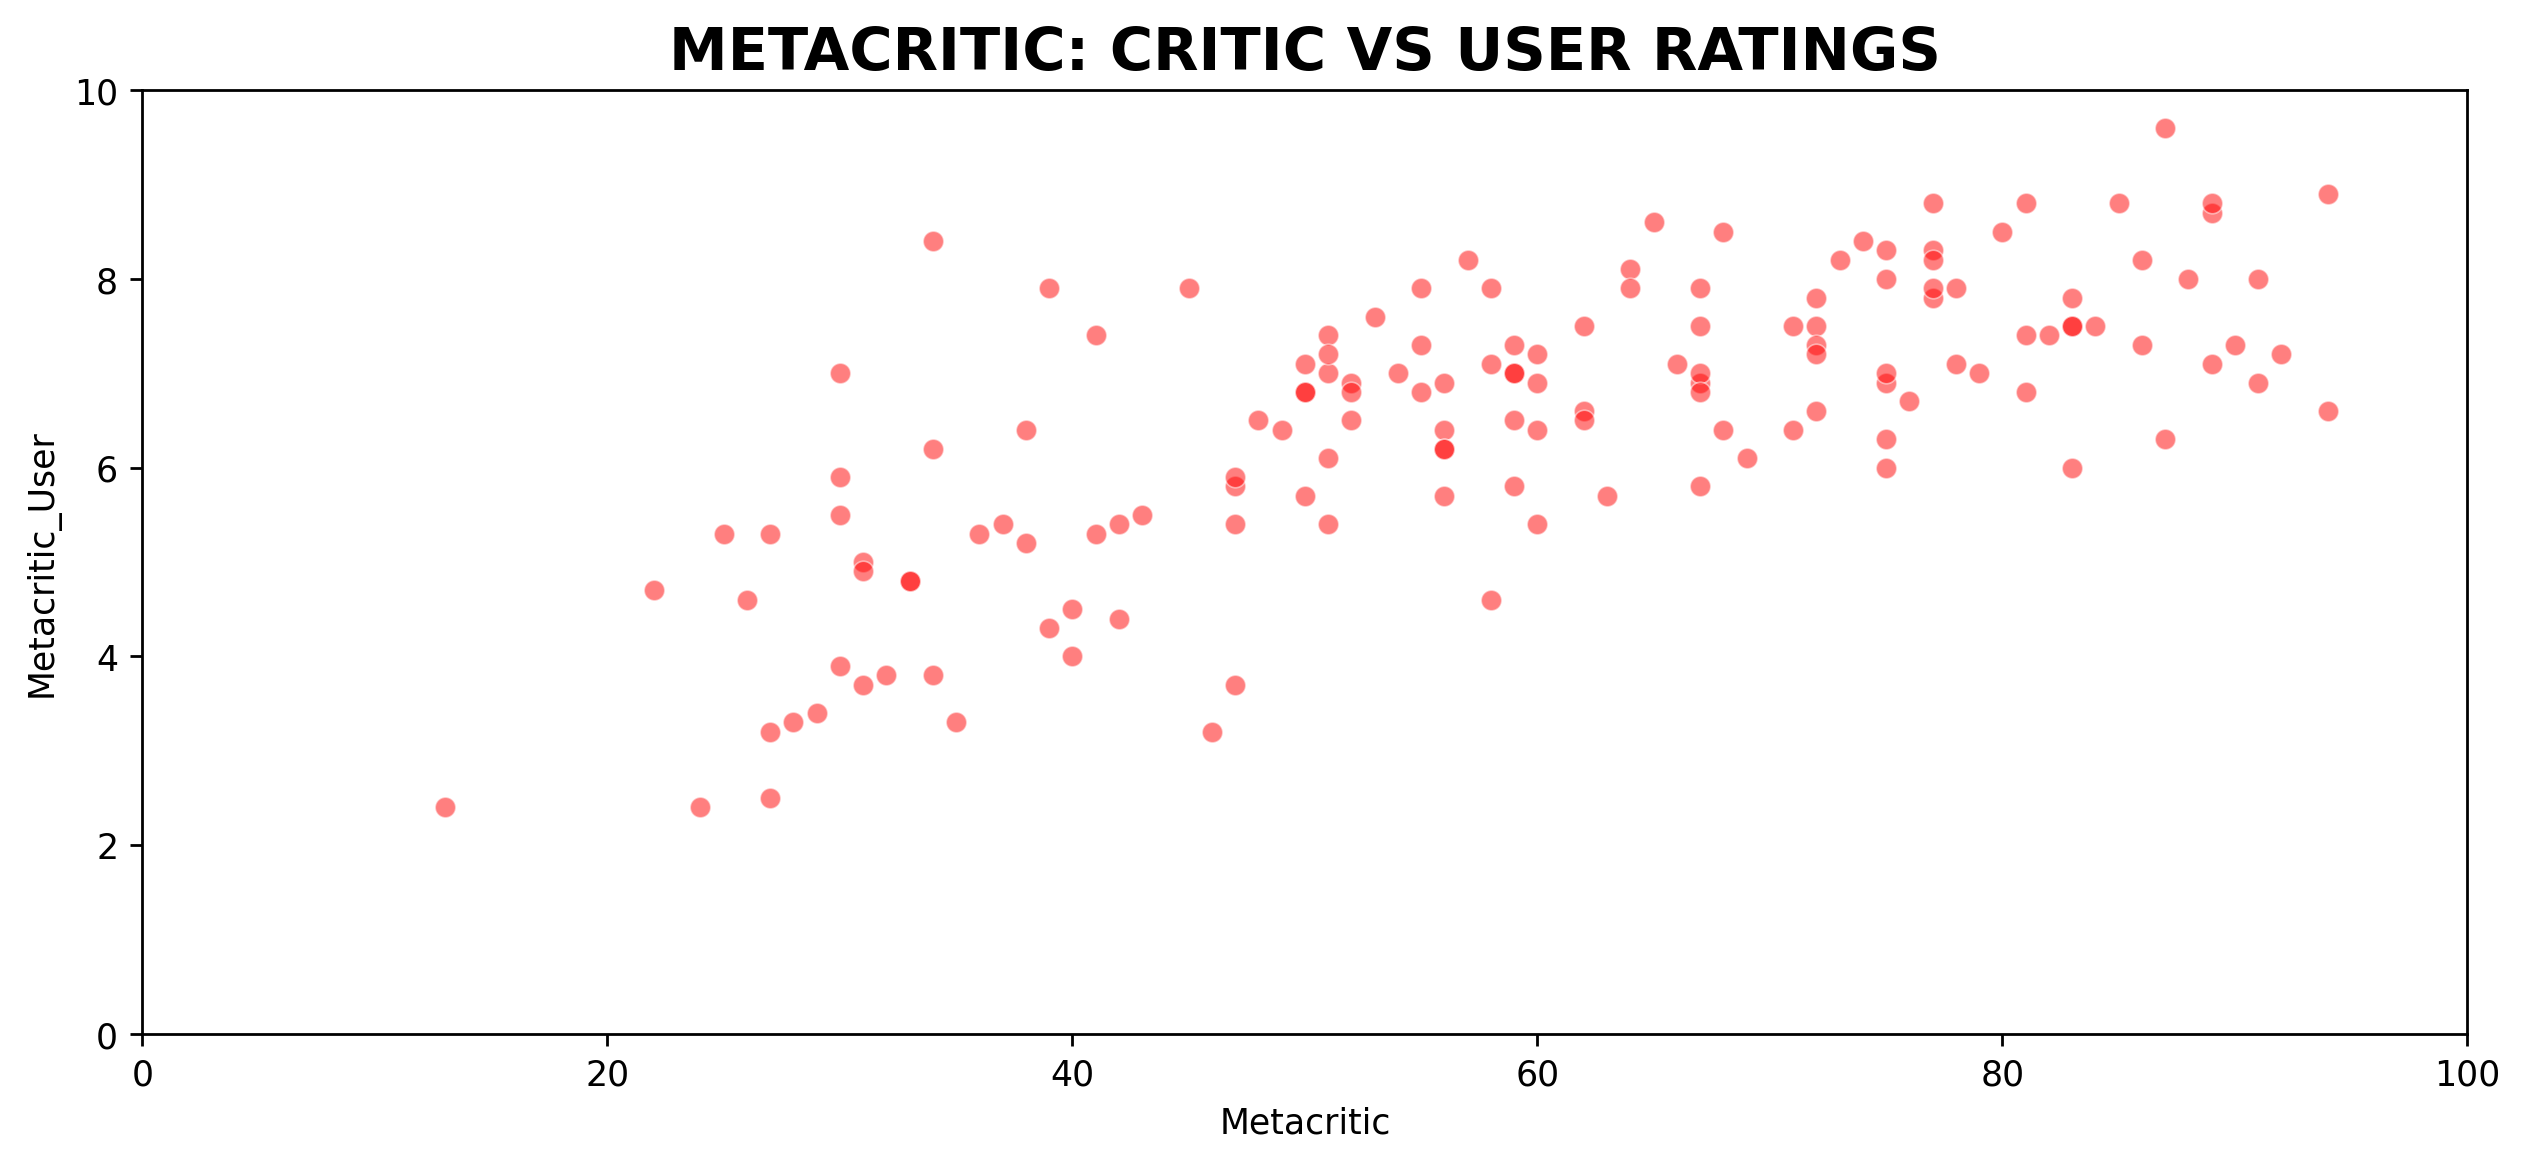

In [143]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.scatterplot(x=df2.Metacritic, 
                      y=df2.Metacritic_User, 
                      ax=ax, 
                      s=35,
                      color='red', 
                      alpha=0.5)

ax.set_title('METACRITIC: CRITIC VS USER RATINGS',
             fontsize=17,
             fontweight=550)

ax.set_xlim(0,100)
ax.set_ylim(0,10)

plt.show()

## IMDB

Finally let's explore IMDB. Notice that both Metacritic and IMDB report back vote counts. Let's analyze the most popular movies.

**TASK: Create a scatterplot for the relationship between vote counts on MetaCritic versus vote counts on IMDB.**

In [144]:
df2.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14


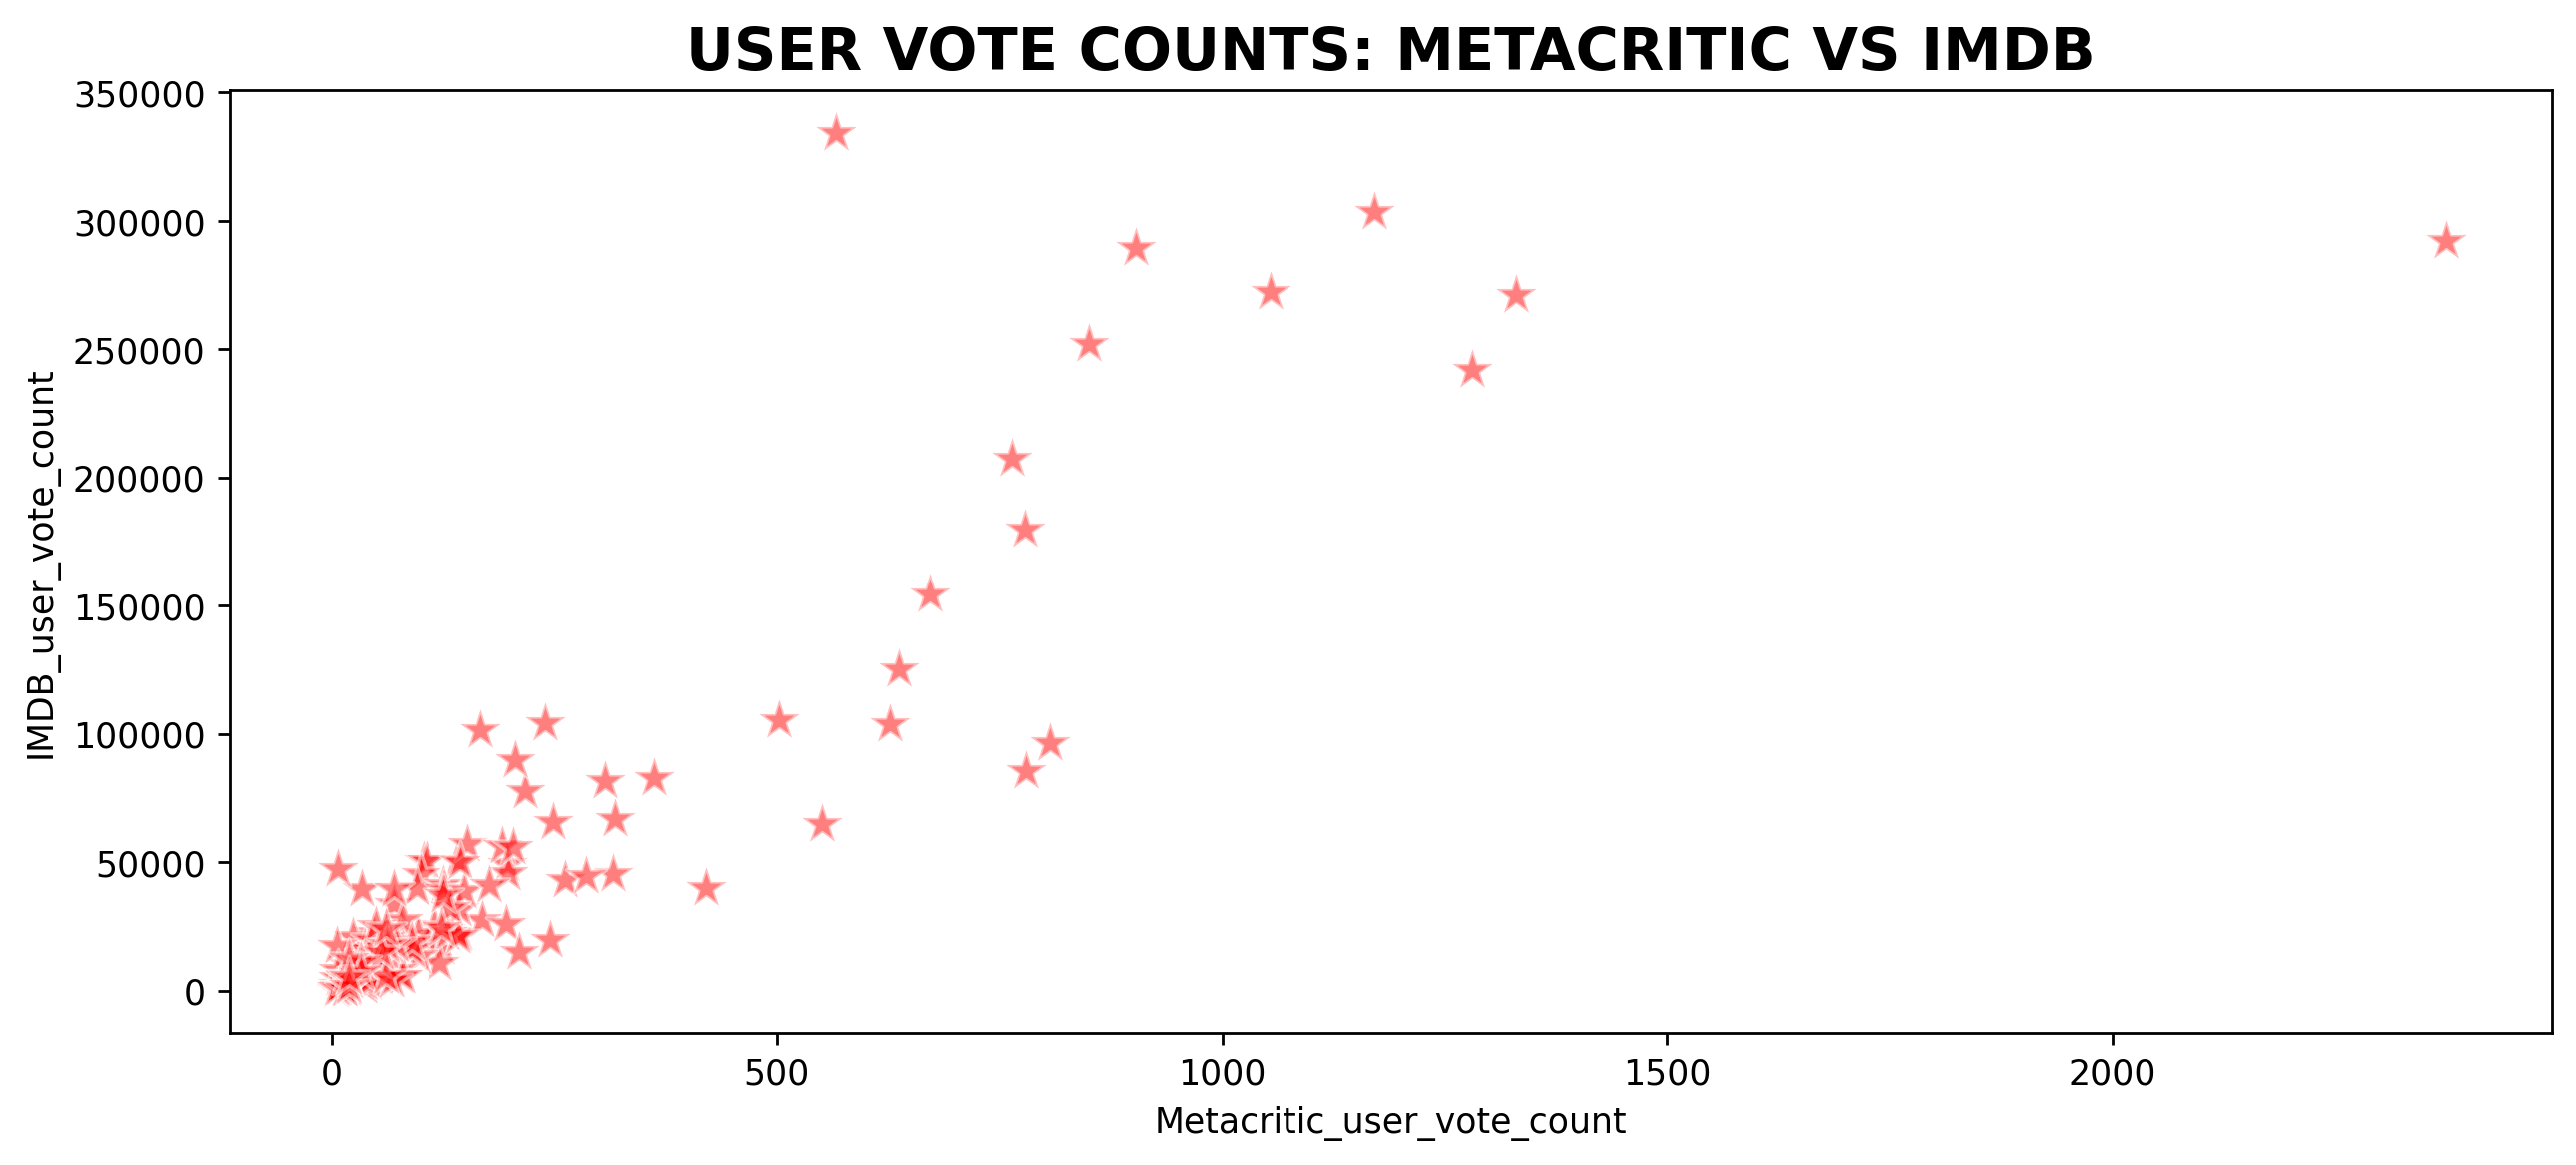

In [145]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.scatterplot(x=df2.Metacritic_user_vote_count,
                      y=df2.IMDB_user_vote_count,
                      alpha=0.5, 
                      color='red',
                      s=150,
                      ax=ax,
                      marker='*')

ax.set_title('USER VOTE COUNTS: METACRITIC VS IMDB',
             fontweight=600,
             fontsize=17)

plt.show()

**Notice there are two outliers here. The movie with the highest vote count on IMDB only has about 500 Metacritic ratings. What is this movie?**

**TASK: What movie has the highest IMDB user vote count?**

In [146]:
#we'll get the index of the row with the highest user votes,
#then access that row...

ind = df2['IMDB_user_vote_count'].idxmax()
df2.iloc[ind]

FILM                          The Imitation Game (2014)
RottenTomatoes                                       90
RottenTomatoes_User                                  92
Metacritic                                           73
Metacritic_User                                     8.2
IMDB                                                8.1
Metacritic_user_vote_count                          566
IMDB_user_vote_count                             334164
Rotten_diff                                          -2
Name: 14, dtype: object

**TASK: What movie has the highest Metacritic User Vote count?**

In [147]:
ind2 = df2['Metacritic_user_vote_count'].idxmax()
df2.iloc[ind2]

FILM                          Mad Max: Fury Road (2015)
RottenTomatoes                                       97
RottenTomatoes_User                                  88
Metacritic                                           89
Metacritic_User                                     8.7
IMDB                                                8.3
Metacritic_user_vote_count                         2375
IMDB_user_vote_count                             292023
Rotten_diff                                           9
Name: 88, dtype: object

## Fandago Scores vs. All Sites

Finally let's begin to explore whether or not Fandango artificially displays higher ratings than warranted to boost ticket sales.

**TASK: Combine the Fandango Table with the All Sites table. Not every movie in the Fandango table is in the All Sites table, since some Fandango movies have very little or no reviews. We only want to compare movies that are in both DataFrames, so do an *inner* merge to merge together both DataFrames based on the FILM columns.**

In [148]:
df3 = df.merge(df2, 
               how='inner',
               on='FILM')
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,Stars_diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [149]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 144
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        145 non-null    object 
 1   STARS                       145 non-null    float64
 2   RATING                      145 non-null    float64
 3   VOTES                       145 non-null    int64  
 4   YEAR                        145 non-null    object 
 5   Stars_diff                  145 non-null    float64
 6   RottenTomatoes              145 non-null    int64  
 7   RottenTomatoes_User         145 non-null    int64  
 8   Metacritic                  145 non-null    int64  
 9   Metacritic_User             145 non-null    float64
 10  IMDB                        145 non-null    float64
 11  Metacritic_user_vote_count  145 non-null    int64  
 12  IMDB_user_vote_count        145 non-null    int64  
 13  Rotten_diff                 145 non

In [150]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,145.0,4.086207,0.541169,3.0,3.5,4.0,4.5,5.0
RATING,145.0,3.841379,0.502437,2.7,3.5,3.9,4.2,4.8
VOTES,145.0,3817.696552,6368.668671,35.0,218.0,1430.0,4279.0,34846.0
Stars_diff,145.0,0.244828,0.152721,0.0,0.1,0.2,0.4,0.5
RottenTomatoes,145.0,60.634483,30.161098,5.0,31.0,63.0,89.0,100.0
RottenTomatoes_User,145.0,63.696552,19.974749,20.0,50.0,66.0,81.0,94.0
Metacritic,145.0,58.696552,19.538183,13.0,43.0,59.0,75.0,94.0
Metacritic_User,145.0,6.508966,1.510883,2.4,5.7,6.8,7.5,9.6
IMDB,145.0,6.729655,0.957944,4.0,6.3,6.9,7.4,8.6
Metacritic_user_vote_count,145.0,184.489655,317.361740,4.0,33.0,72.0,167.0,2375.0


### Normalize columns to Fandango STARS and RATINGS 0-5 

Notice that RT,Metacritic, and IMDB don't use a score between 0-5 stars like Fandango does. In order to do a fair comparison, we need to *normalize* these values so they all fall between 0-5 stars and the relationship between reviews stays the same.

**TASK: Create new normalized columns for all ratings so they match up within the 0-5 star range shown on Fandango. There are many ways to do this.**

Hint link: https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame


Easier Hint:

Keep in mind, a simple way to convert ratings:
* 100/20 = 5 
* 10/2 = 5

In [151]:
df3.head()

,FILM,STARS,RATING,VOTES,YEAR,Stars_diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,98,90,94,8.9,8.6,807,96252,8


In [152]:
# def normalize(rt):
#     if rt>0 and rt<=10:
#         rt = rt/2
#         return np.round(rt, 1)
    
#     elif rt>10 and rt<=100:
#         rt = rt/20
#         #print(rt)
#         return np.round(rt, 1)
        
# normalize(87)

In [153]:
# Dont run this cell multiple times, otherwise you keep dividing!
df3['RottenTomatoes'] = np.round(df3['RottenTomatoes']/20,1)
df3['RottenTomatoes_User'] =  np.round(df3['RottenTomatoes_User']/20,1)
df3['Metacritic'] =  np.round(df3['Metacritic']/20,1)
df3['Metacritic_User'] =  np.round(df3['Metacritic_User']/2,1)
df3['IMDB'] = np.round(df3['IMDB']/2,1)

df3

,FILM,STARS,RATING,VOTES,YEAR,Stars_diff,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1,1.2,2.1,2.3,1.6,2.1,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0,3.6,4.0,3.0,3.5,3.6,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,0.2,3.6,4.2,3.6,3.3,3.7,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2,4.0,4.2,3.4,3.4,3.7,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,0.0,4.9,4.5,4.7,4.4,4.3,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,0.0,4.4,3.2,3.4,3.2,3.4,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,0.4,4.8,4.0,4.4,3.2,3.5,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,0.3,4.6,4.2,3.4,3.5,3.9,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,0.1,4.8,4.3,4.3,3.6,3.7,14,696,9


**TASK: Now create a norm_scores DataFrame that only contains the normalizes ratings. Include both STARS and RATING from the original Fandango table.**

In [154]:
df_norm = df3[['STARS', 'RATING',
               'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
               'Metacritic_User', 'IMDB']]

df_norm

,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.0,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [155]:
df3.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'Stars_diff',
       'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
       'Metacritic_User', 'IMDB', 'Metacritic_user_vote_count',
       'IMDB_user_vote_count', 'Rotten_diff'],
      dtype='object')

### Comparing Distribution of Scores Across Sites


Now the moment of truth! Does Fandango display abnormally high ratings? We already know it pushs displayed RATING higher than STARS, but are the ratings themselves higher than average?


**TASK: Create a plot comparing the distributions of normalized ratings across all sites. There are many ways to do this, but explore the Seaborn KDEplot docs for some simple ways to quickly show this. Don't worry if your plot format does not look exactly the same as ours, as long as the differences in distribution are clear.**

Quick Note if you have issues moving the legend for a seaborn kdeplot: https://github.com/mwaskom/seaborn/issues/2280

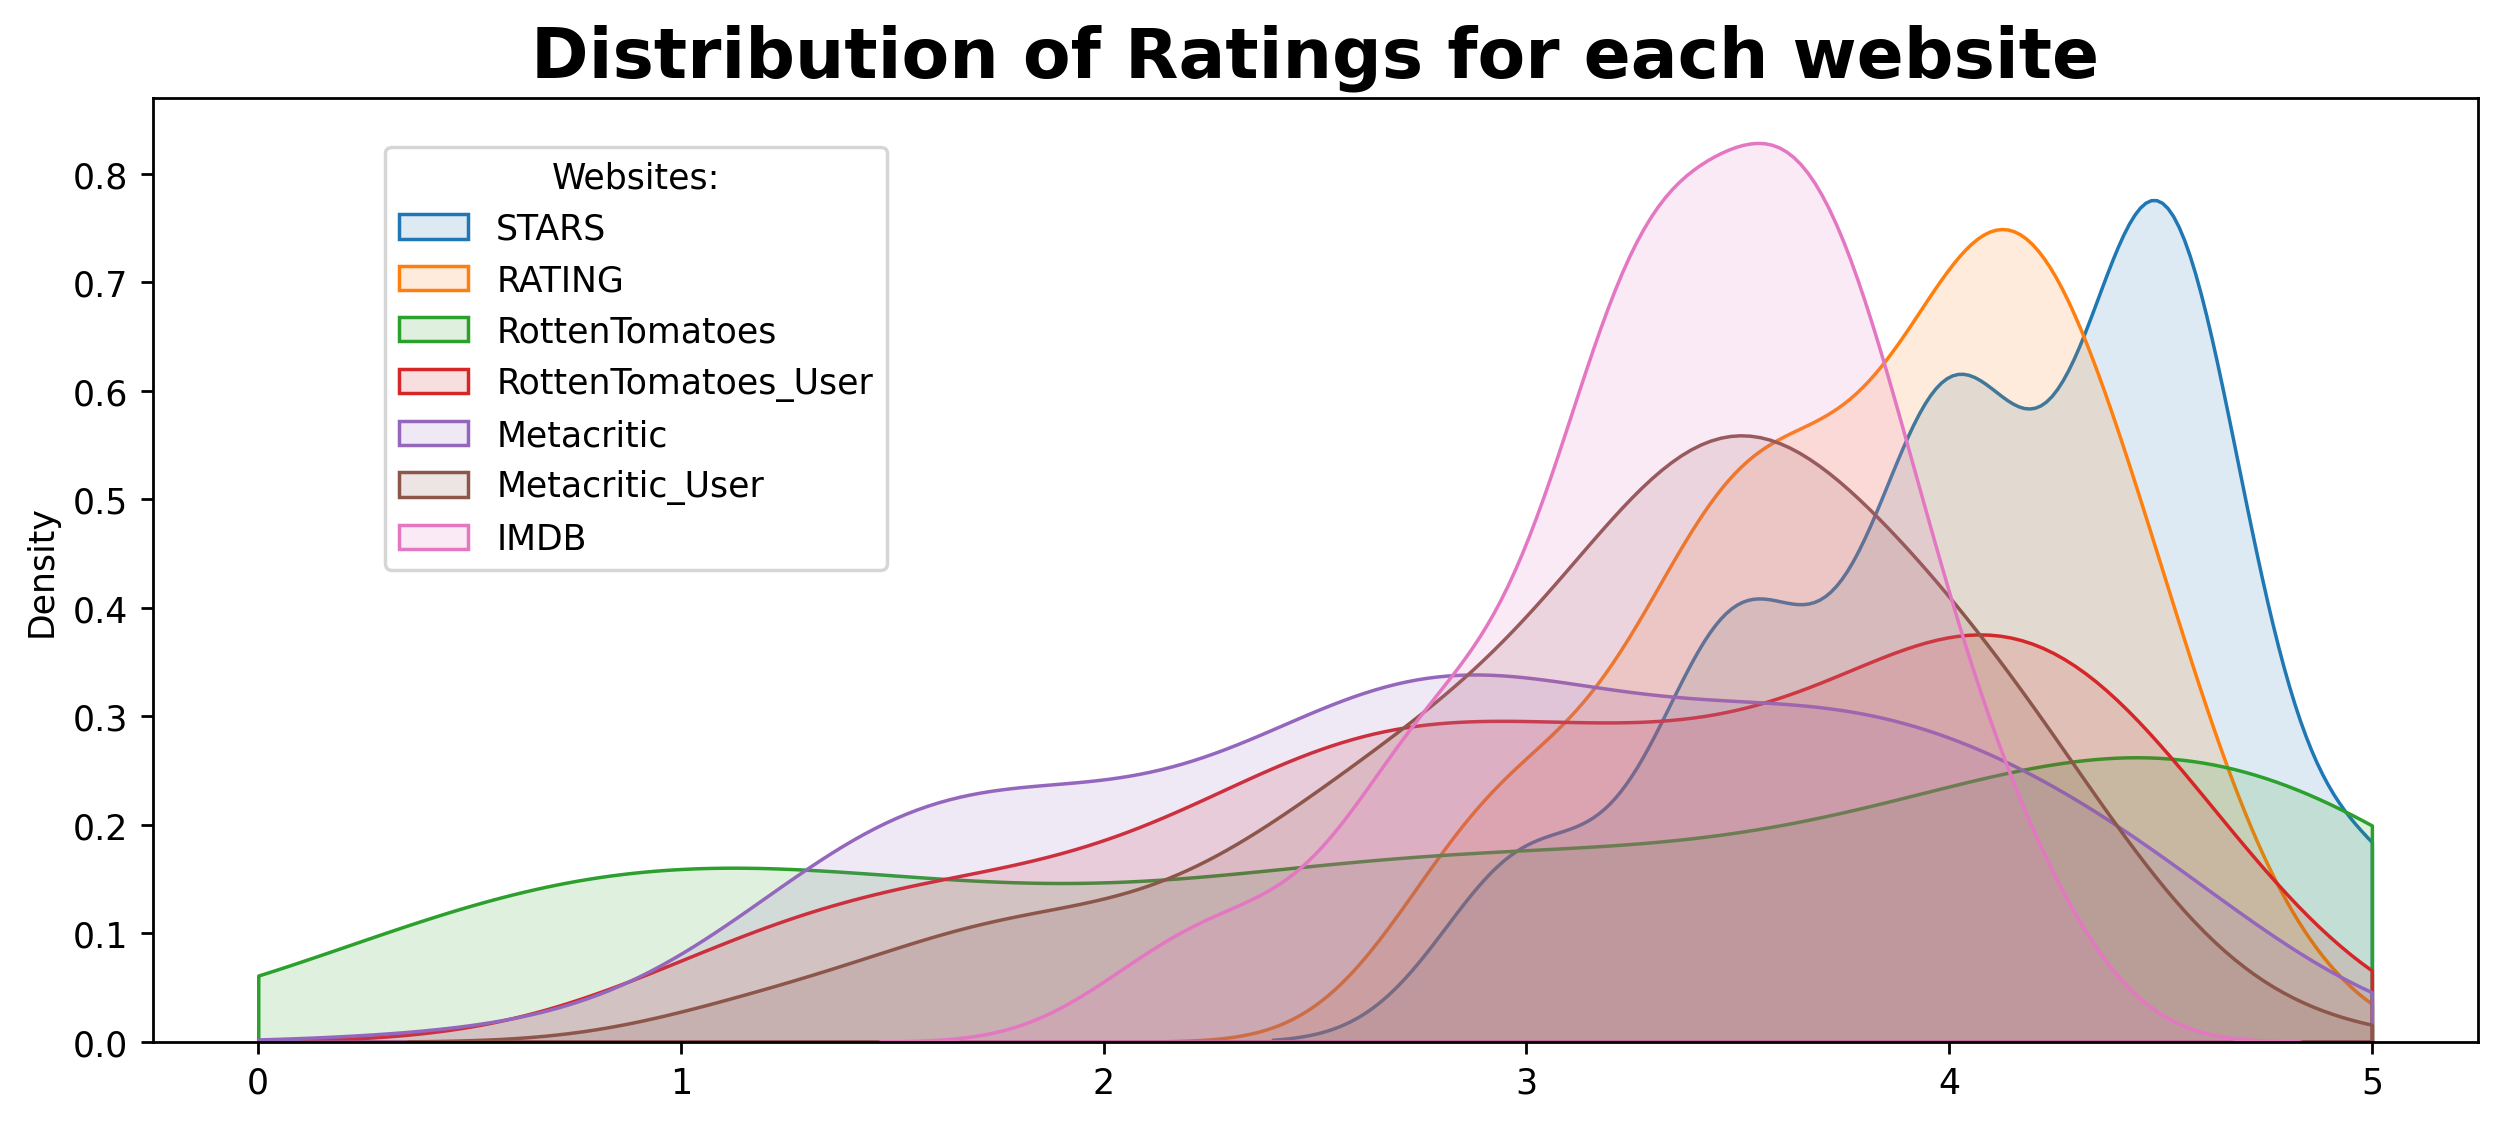

In [156]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)

for x in df_norm.columns:
    fig = sns.kdeplot(data=df_norm,
                      x=x,
                      label=x,
                      shade=True,
                      ax=ax,
                      clip=[0,5],
                      palette='Set2',
                      alpha=0.15)

ax.set_title('Distribution of Ratings for each website',
             fontsize=20,
             fontweight=600)

ax.set_xlabel('')
plt.legend(loc=[0.1,0.5], title='Websites:')

**Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform distribution. Let's directly compare these two.** 

**TASK: Create a KDE plot that compare the distribution of RT critic ratings against the STARS displayed by Fandango.**

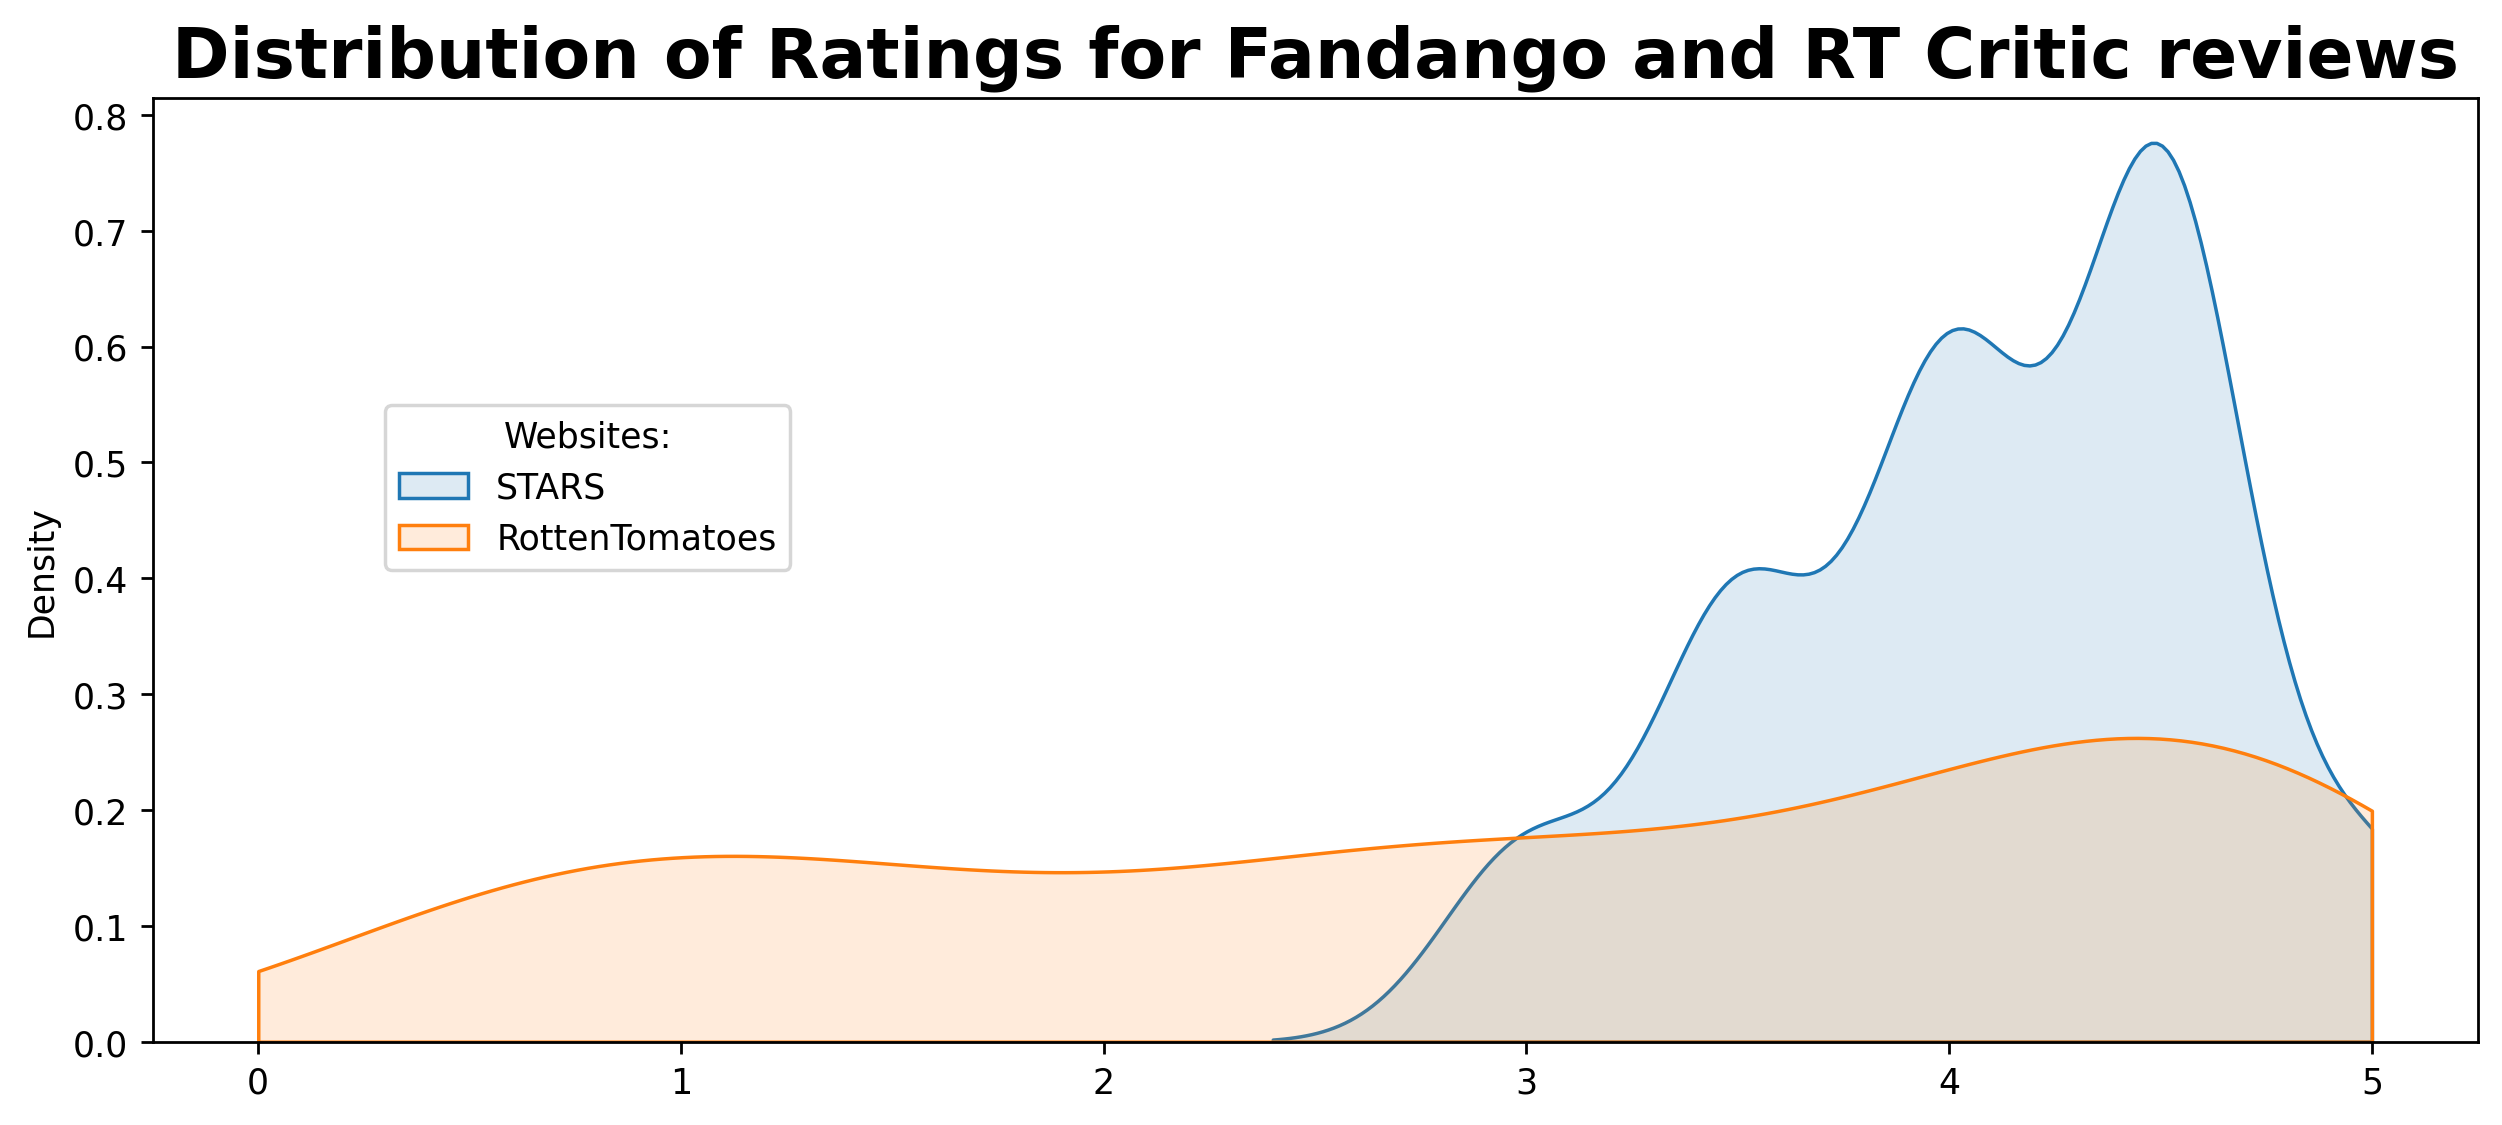

In [157]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)

for x in df_norm.columns[0:3:2]:
    fig = sns.kdeplot(data=df_norm,
                      x=x,
                      label=x,
                      shade=True,
                      ax=ax,
                      clip=[0,5],
                      palette='Set2',
                      alpha=0.15)

ax.set_title('Distribution of Ratings for Fandango and RT Critic reviews',
             fontsize=20,
             fontweight=600)

ax.set_xlabel('')
plt.legend(loc=[0.1,0.5], title='Websites:')


### How are the worst movies rated across all platforms?

**TASK: Create a clustermap visualization of all normalized scores. Note the differences in ratings, highly rated movies should be clustered together versus poorly rated movies. Note: This clustermap does not need to have the FILM titles as the index, feel free to drop it for the clustermap.**

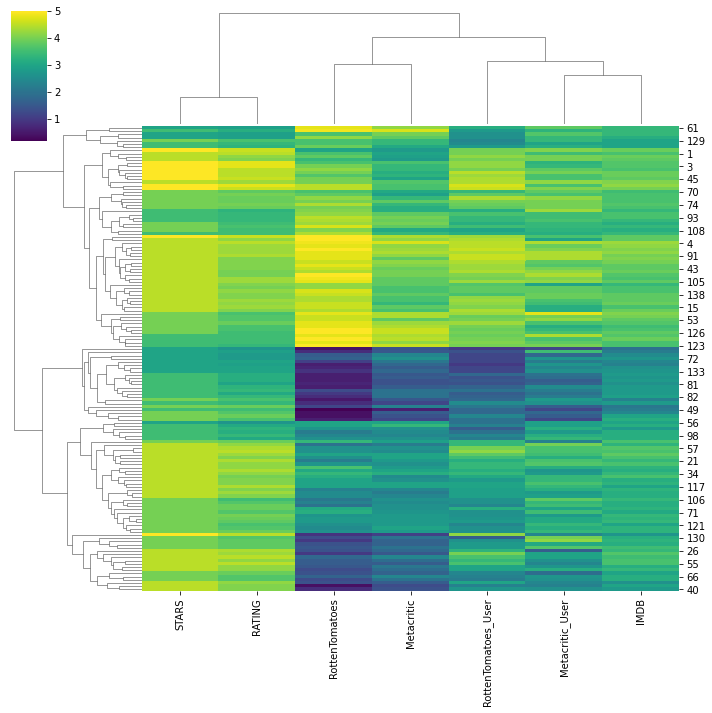

In [158]:
fig = sns.clustermap(df_norm,
                     cmap='viridis')

**TASK: Clearly Fandango is rating movies much higher than other sites, especially considering that it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies? What are the normalized scores across all platforms for these movies? You may need to add the FILM column back in to your DataFrame of normalized scores to see the results.**

In [159]:
df_final = df3[['FILM','STARS', 'RATING',
               'RottenTomatoes', 'RottenTomatoes_User', 'Metacritic',
               'Metacritic_User', 'IMDB']]

low = df_final.nsmallest(10, 'RottenTomatoes')
low

,FILM,STARS,RATING,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


In [160]:
df_final['RottenTomatoes'].min()

0.2

**FINAL TASK: Visualize the distribution of ratings across all sites for the top 10 worst movies.**

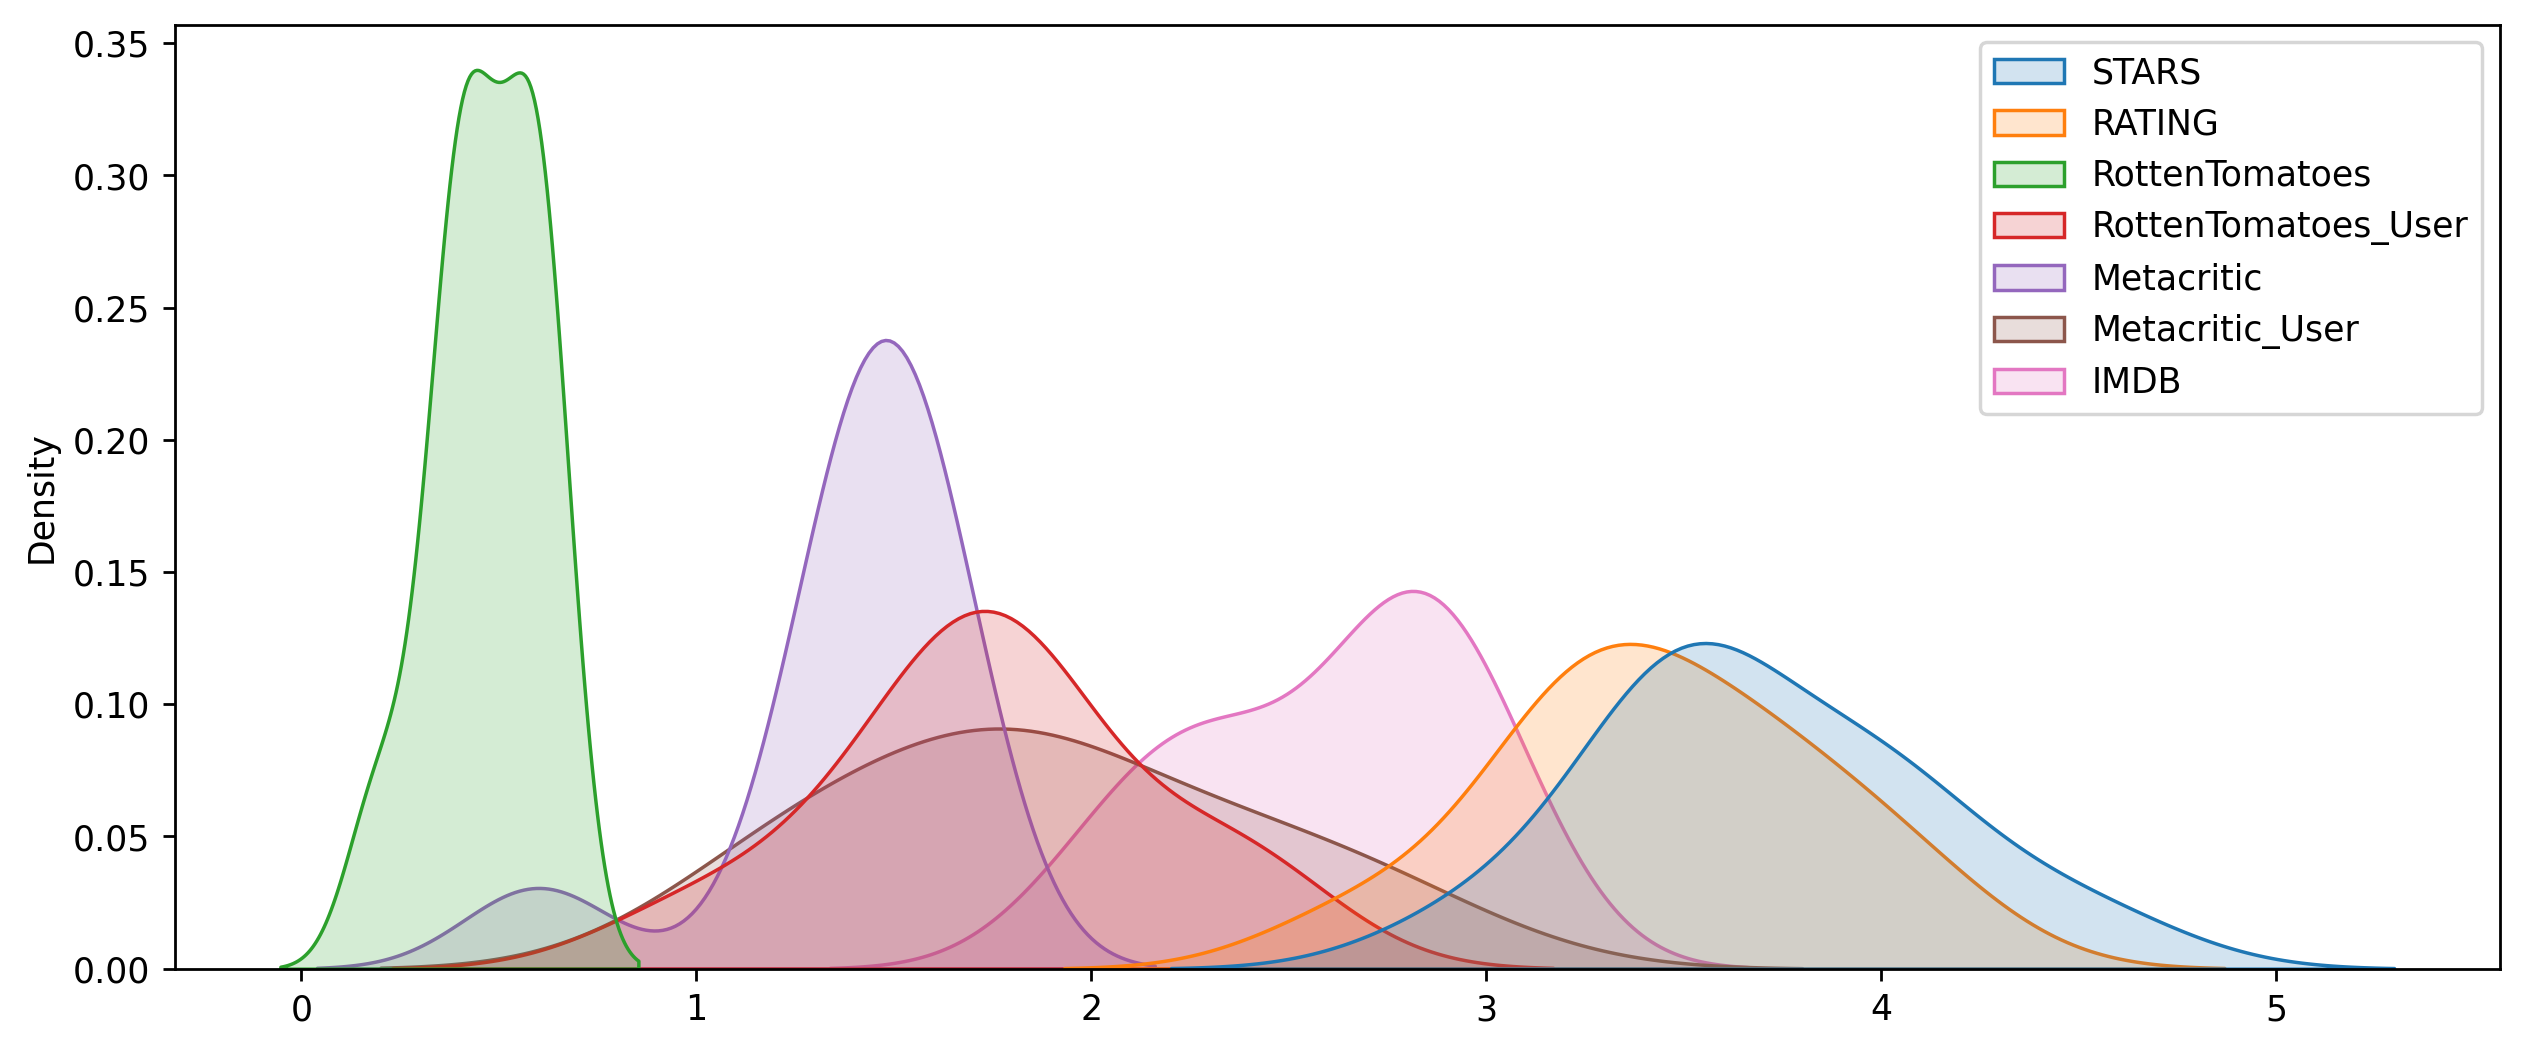

In [161]:
fig, ax = plt.subplots(1,1,figsize=(12,5), dpi=250, sharex=True)
fig = sns.kdeplot(data=low.drop('FILM', axis=1),
                  shade=True,
                  alpha=0.2)

---
----

<img src="https://upload.wikimedia.org/wikipedia/en/6/6f/Taken_3_poster.jpg">

**Final thoughts: Wow! Fandango is showing around 3-4 star ratings for films that are clearly bad! Notice the biggest offender, [Taken 3!](https://www.youtube.com/watch?v=tJrfImRCHJ0). Fandango is displaying 4.5 stars on their site for a film with an [average rating of 1.86](https://en.wikipedia.org/wiki/Taken_3#Critical_response) across the other platforms!**

----

In [162]:
df_final.iloc[25]

FILM                   Taken 3 (2015)
STARS                             4.5
RATING                            4.1
RottenTomatoes                    0.4
RottenTomatoes_User               2.3
Metacritic                        1.3
Metacritic_User                   2.3
IMDB                              3.0
Name: 25, dtype: object

## Rating given by Fandango: 4.5 

In [165]:
(4.5 + 0.4 + 2.3 + 1.3 + 2.3 + 3.0)/6

2.3000000000000003

## Average rating for all sites (including Fandango): 2.3

# Conclusion:
## There is a conflict of interest experienced by a company that both sells movie tickets and rates movies.
## According to the data, they will most likely inflate the rating of the movie, with a view to selling more tickets.